___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Tree Types Prediction Project***". This is the second medium project of ***Machine Learning*** course.

In this project, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering (using ***sqlite3*** library) will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind classification models and scikit-learn module as well as Machine Learning before you begin.*

## Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling.

At this point, in order to improve your skills of using SQL with Python, you are asked to perform feature engineering operations using *sqlite3* library in Python.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** and ***K-Nearest Neighbors (KNN)*** algorithms. Also, evaluate the success of your models with appropriate performance metrics and visualize them using ***Yellowbrick, Seaborn*** or ***Matplotlib*** modules.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.

- ***NOTE:*** *Evaluate your models knowing that this is [imbalanced data](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb). This is not the primary goal of the project, but you can study solve the class [imbalance problem](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28) if you want.*



---
---

## Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*
    
    *ii. Drop Outliers*


#### 3. Feature Engineering with sqlite3 Module


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement XGBoost Classifer
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement KNN Classifer
- Implement Random Forest Classifer
- Compare The Models



## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
# plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### *ii. Load Dataset*

In [2]:
tree = pd.read_csv("covtype.csv")

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [3]:
tree.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [5]:
tree.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.000,2959.365,279.985,1859.000,2809.000,2996.000,3163.000,3858.000
Aspect,581012.000,155.657,111.914,0.000,58.000,127.000,260.000,360.000
Slope,581012.000,14.104,7.488,0.000,9.000,13.000,18.000,66.000
Horizontal_Distance_To_Hydrology,581012.000,269.428,212.549,0.000,108.000,218.000,384.000,1397.000
Vertical_Distance_To_Hydrology,581012.000,46.419,58.295,-173.000,7.000,30.000,69.000,601.000
Horizontal_Distance_To_Roadways,581012.000,2350.147,1559.255,0.000,1106.000,1997.000,3328.000,7117.000
Hillshade_9am,581012.000,212.146,26.770,0.000,198.000,218.000,231.000,254.000
Hillshade_Noon,581012.000,223.319,19.769,0.000,213.000,226.000,237.000,254.000
Hillshade_3pm,581012.000,142.528,38.275,0.000,119.000,143.000,168.000,254.000
Horizontal_Distance_To_Fire_Points,581012.000,1980.291,1324.195,0.000,1024.000,1710.000,2550.000,7173.000


In [6]:
tree.apply(lambda x: x.nunique())

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

>### Summary results :
>- ``"Elevation"``, `"Slope"`, `"Horizontal_Distance_To_Hydrology"`, `"Vertical_Distance_To_Hydrology"`, `"Horizontal_Distance_To_Roadways"`, `"Horizontal_Distance_To_Fire_Points"` are continuous variables and their values vary.
>- `"Aspect"` is also continuous and its values vary from 0 to 360. It has angular values.
>- ``"Hillshade_3pm"``, ``"Hillshade_Noon"``, ``"Hillshade_3pm"`` are also continuos and their values vary from 0 to 255. This means that the values represent bitwise value. I concluded that the values are RGB color representation of the shadow at a particular time.
>- ``Wilderness_Areas`` and `Soil_Types` are categorical (binary 1 or 0) data.

In [7]:
tree_type_dist = pd.DataFrame(tree.Cover_Type.value_counts())
tree_type_dist["ratio"] = tree.Cover_Type.value_counts(normalize = True)*100
tree_type_dist.columns = ["count", "ratio"]
tree_type_dist

,count,ratio
2,283301,48.760
1,211840,36.461
3,35754,6.154
7,20510,3.530
6,17367,2.989
5,9493,1.634
4,2747,0.473


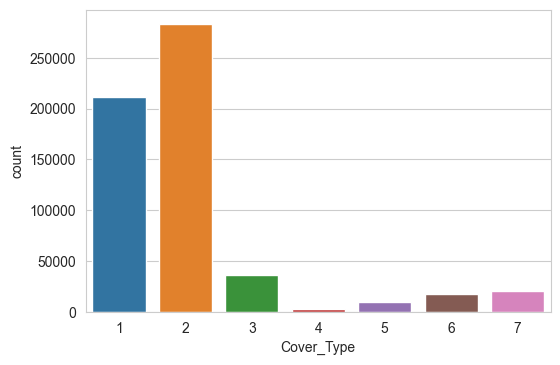

In [8]:
sns.countplot(tree.Cover_Type);

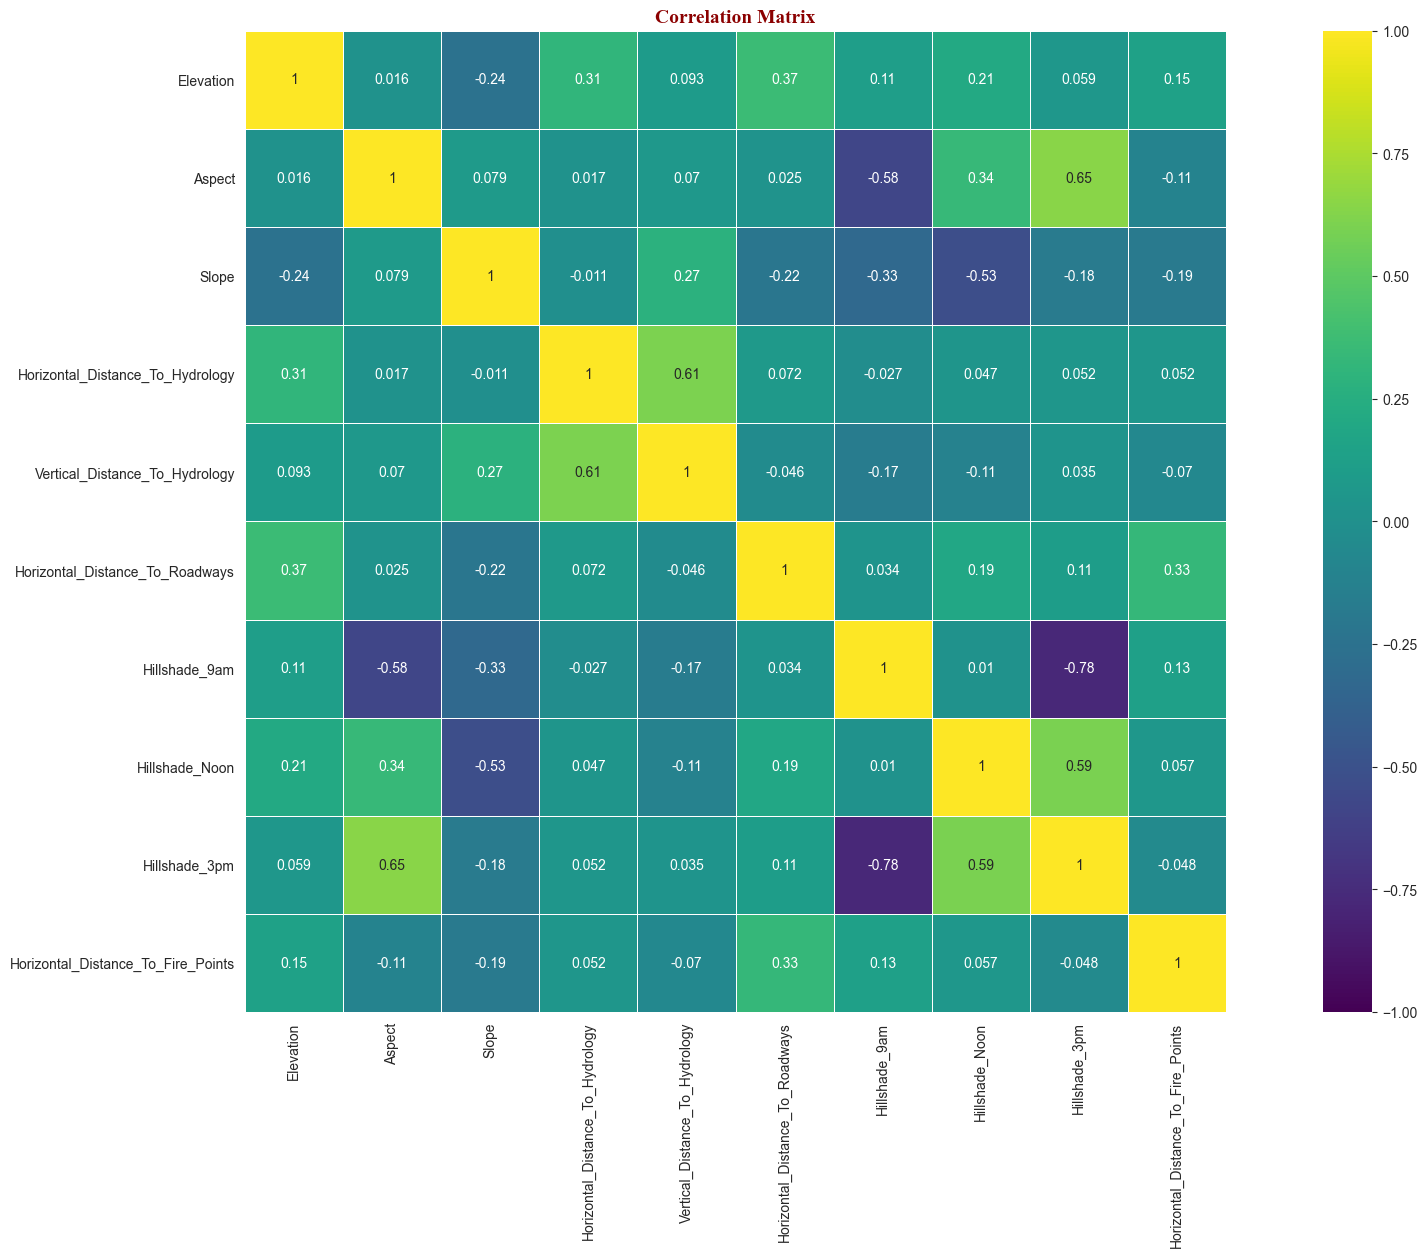

In [9]:
corr_matrix = tree[tree.columns[:10]].corr()

font_title = {'family': 'times new roman',
              'color': 'darkred',
              'weight': 'bold',
              'size': 14}

plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)
plt.show()

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [10]:
tree.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.

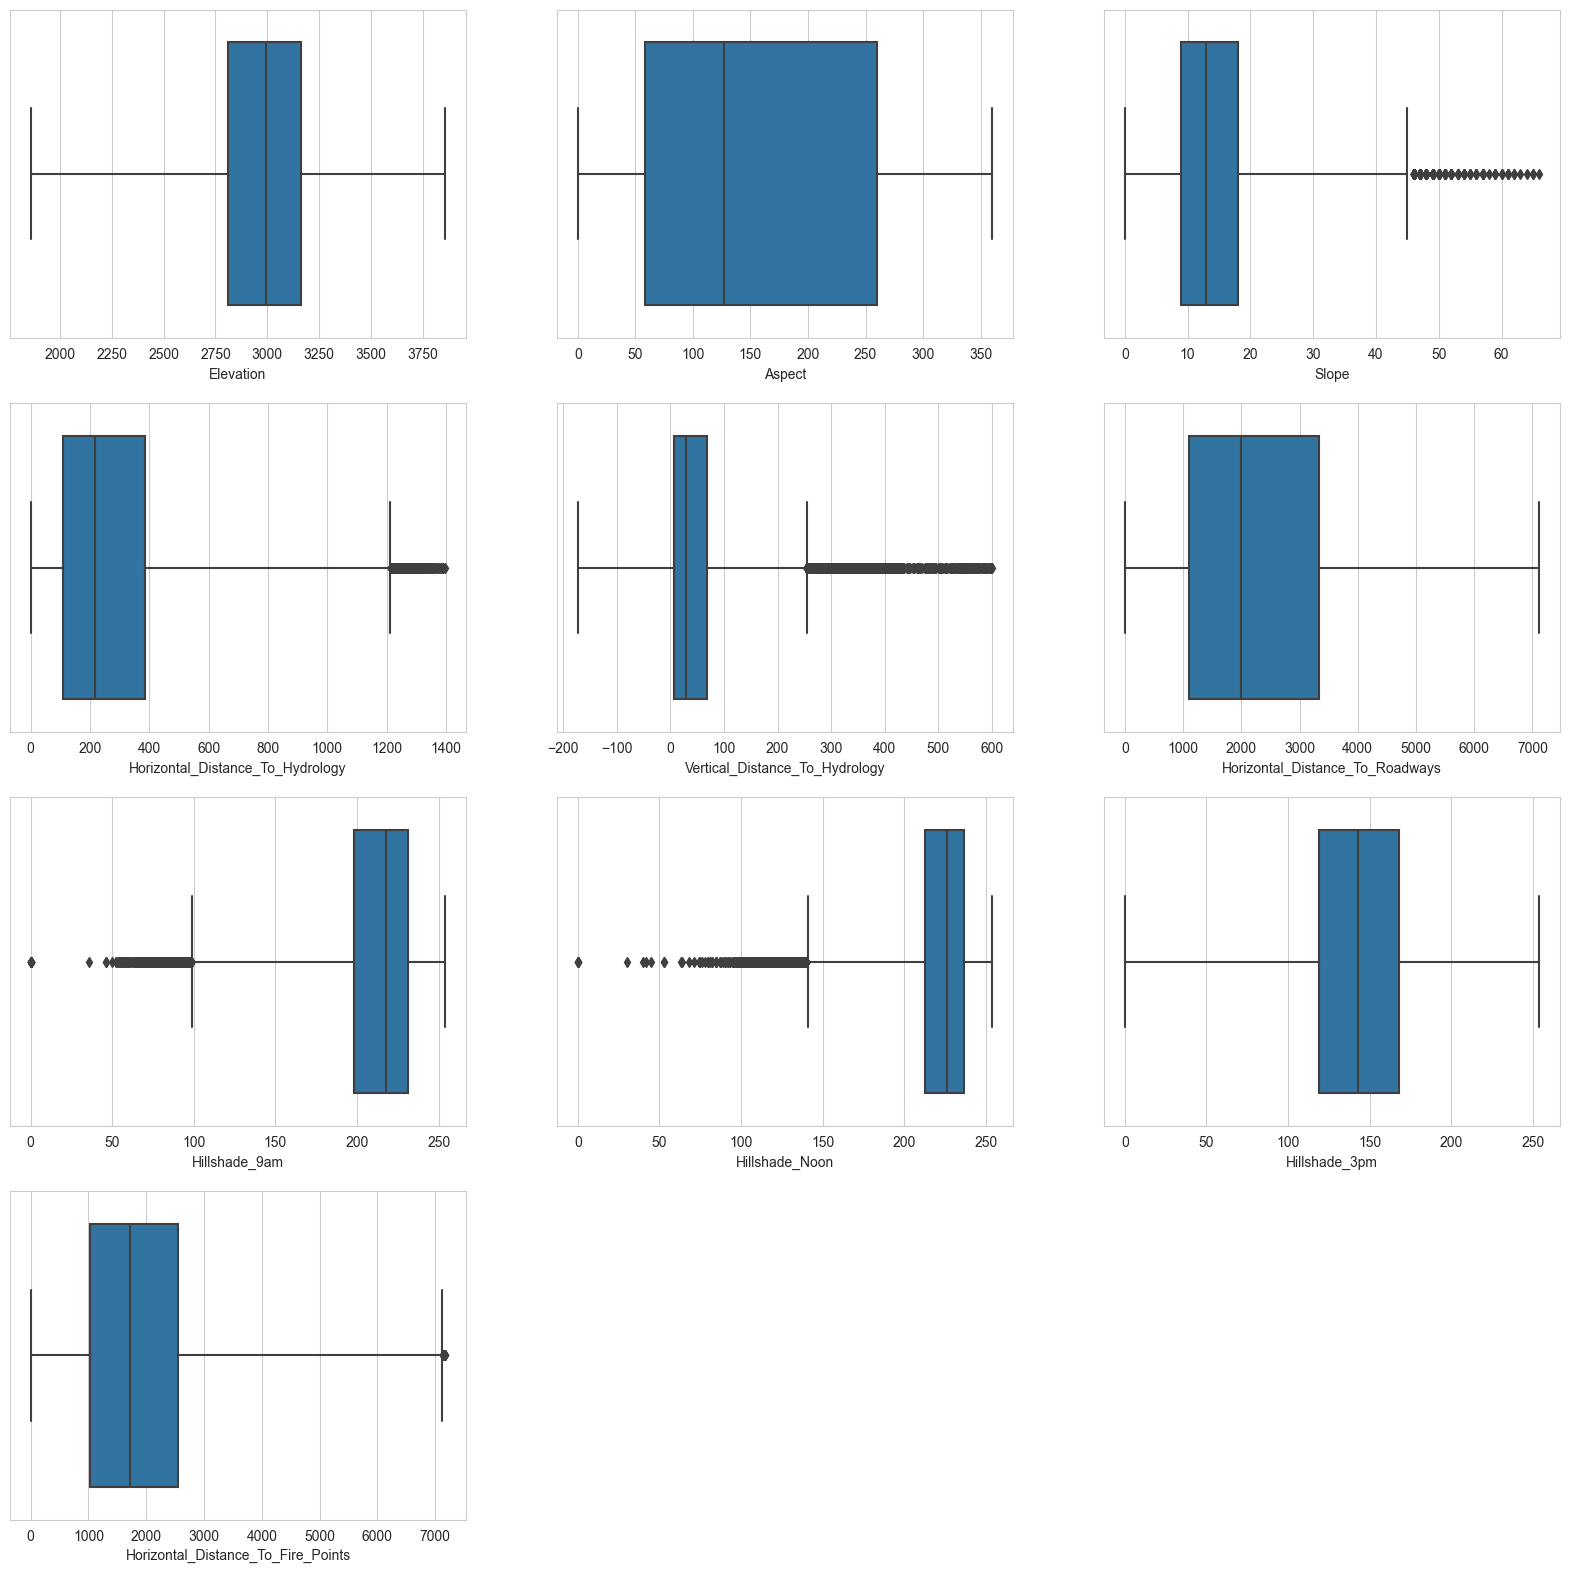

In [11]:
index = 0
plt.figure(figsize=(20,20))
for feature in tree.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(x=feature, data=tree, whis=3)

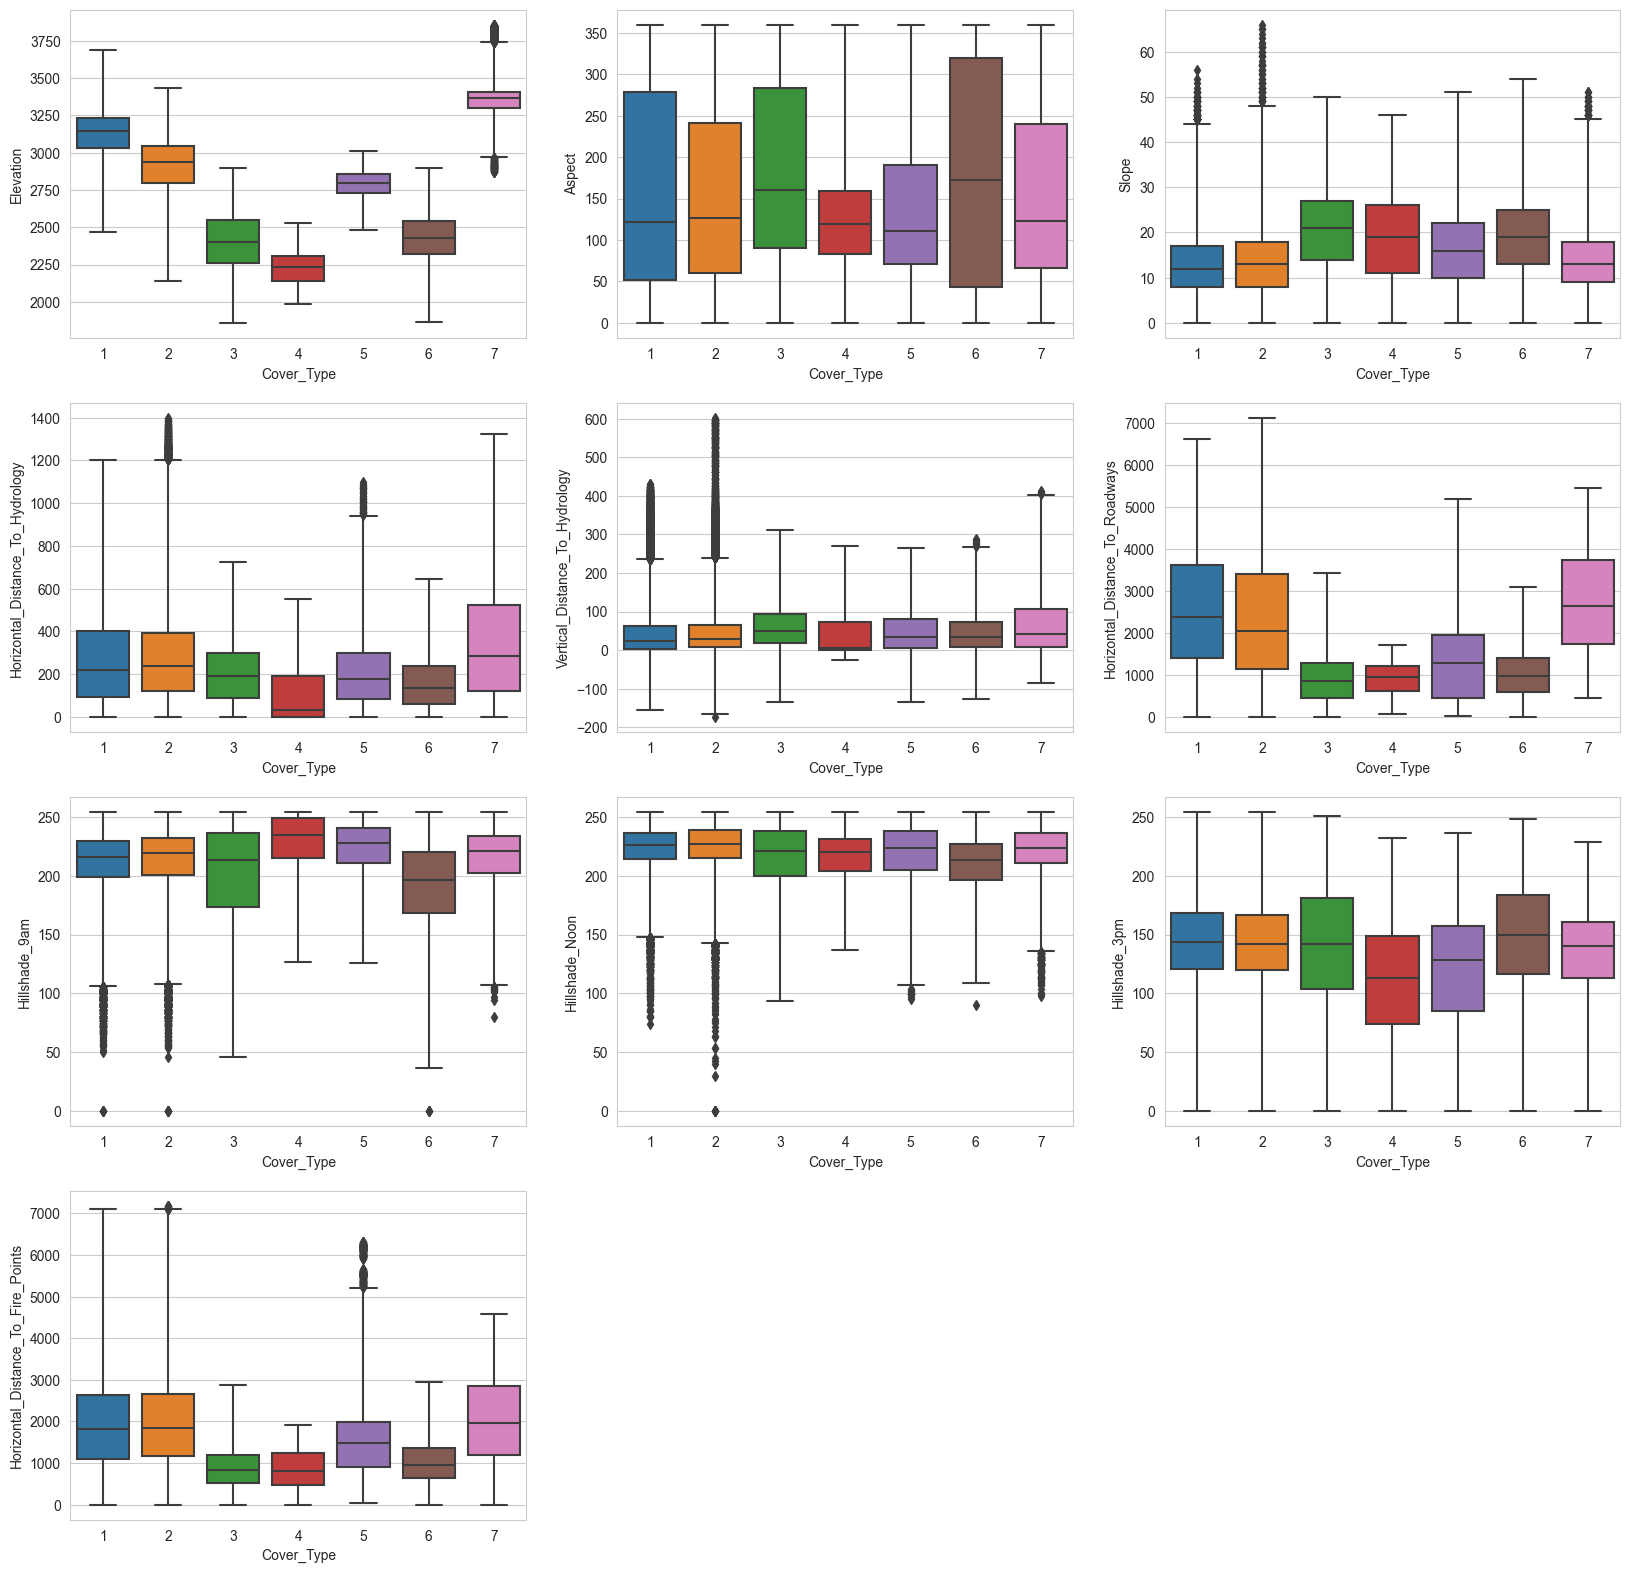

In [12]:
index = 0
plt.figure(figsize=(20,20))
for feature in tree.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(y = feature, x = "Cover_Type", data = tree, whis=3)

### Deal with Outliers

#### *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*

There are many different methods for outliers. You can use IQR values used as standard to deal with outliers, or you can define two functions to help you understand the outliers and how you can deal with them.
- Two functions given as extra for outlier detection are given below.

### Other steps planning to do

- First, I will choose the columns which have unique values more than 7.
- Second, I will define two functions to help me understand the outliers and how I can handle with them.
- Third, I will define another function to detect outliers in accordance with the ``zscore`` (how many times IQR) value I choose according to the result from the previous functions.
- Lastly, I will drop rows which have outliers.

In [13]:
from scipy.stats import zscore
from scipy import stats
from numpy import percentile

In [14]:
'''This function detects the best z-score for outlier detection in the specified column.'''

def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = stats.zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                   np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile_threshold)

In [15]:
'''This function plots histogram, boxplot and z-score/outlier graphs for the specified column.'''

def outlier_inspect(df, col, min_z = 1, max_z = 5, step = 0.05, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z = min_z, max_z = max_z, step = step)
    plt.show()

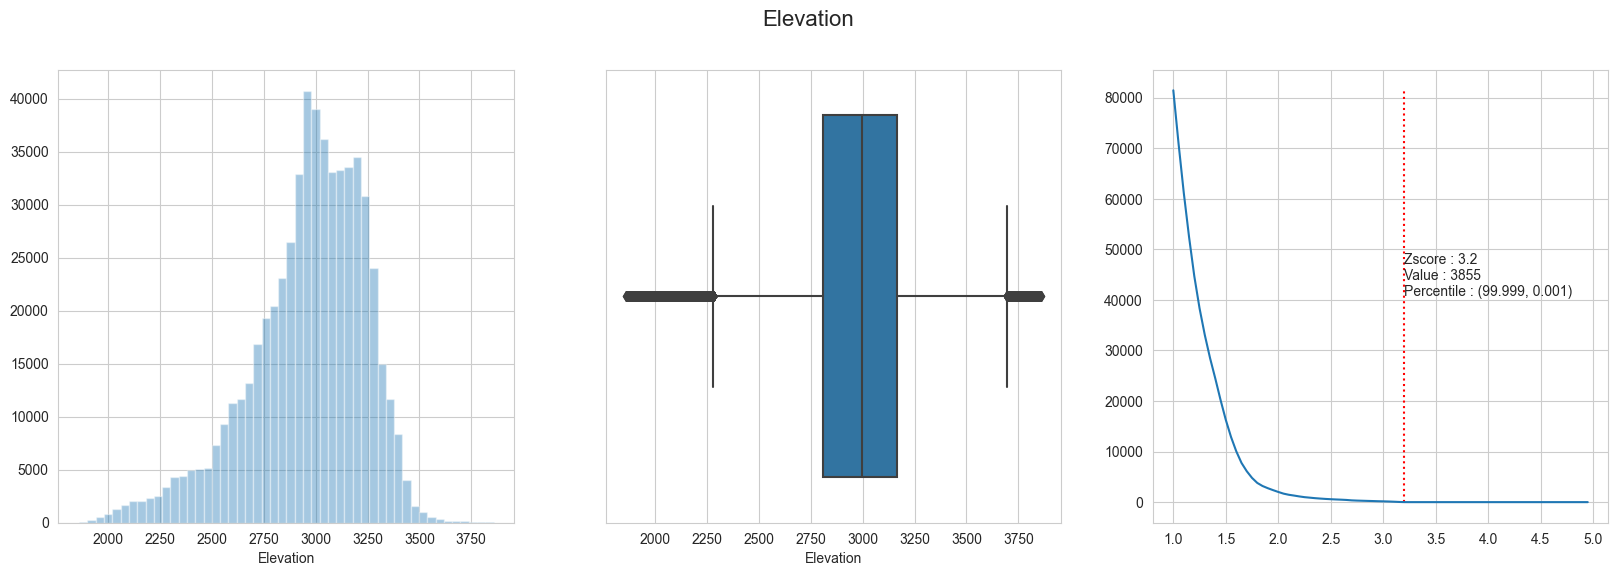

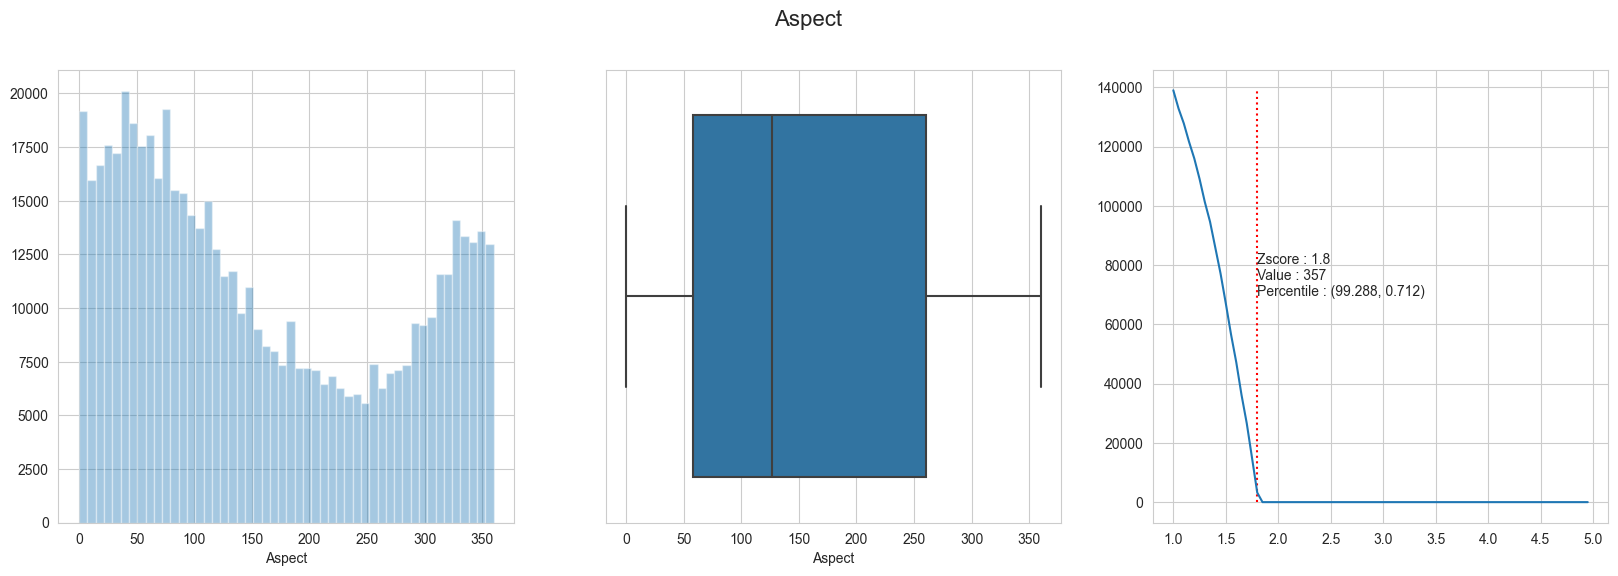

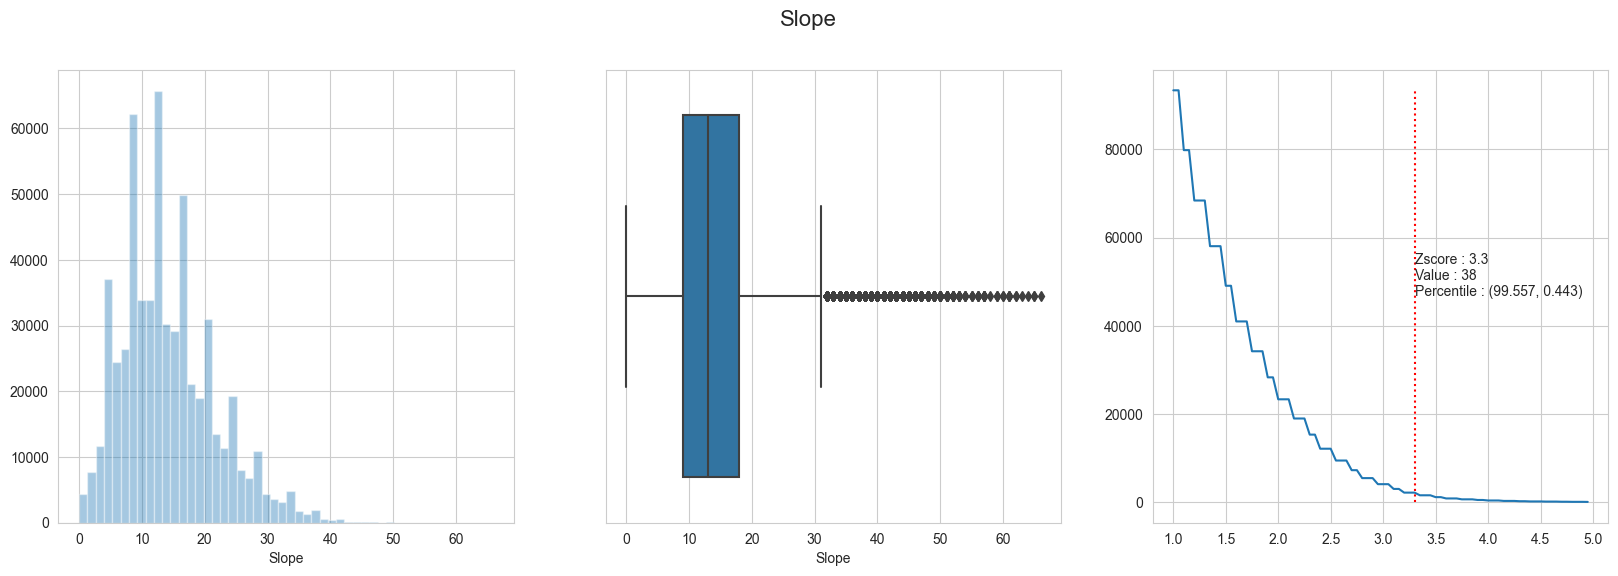

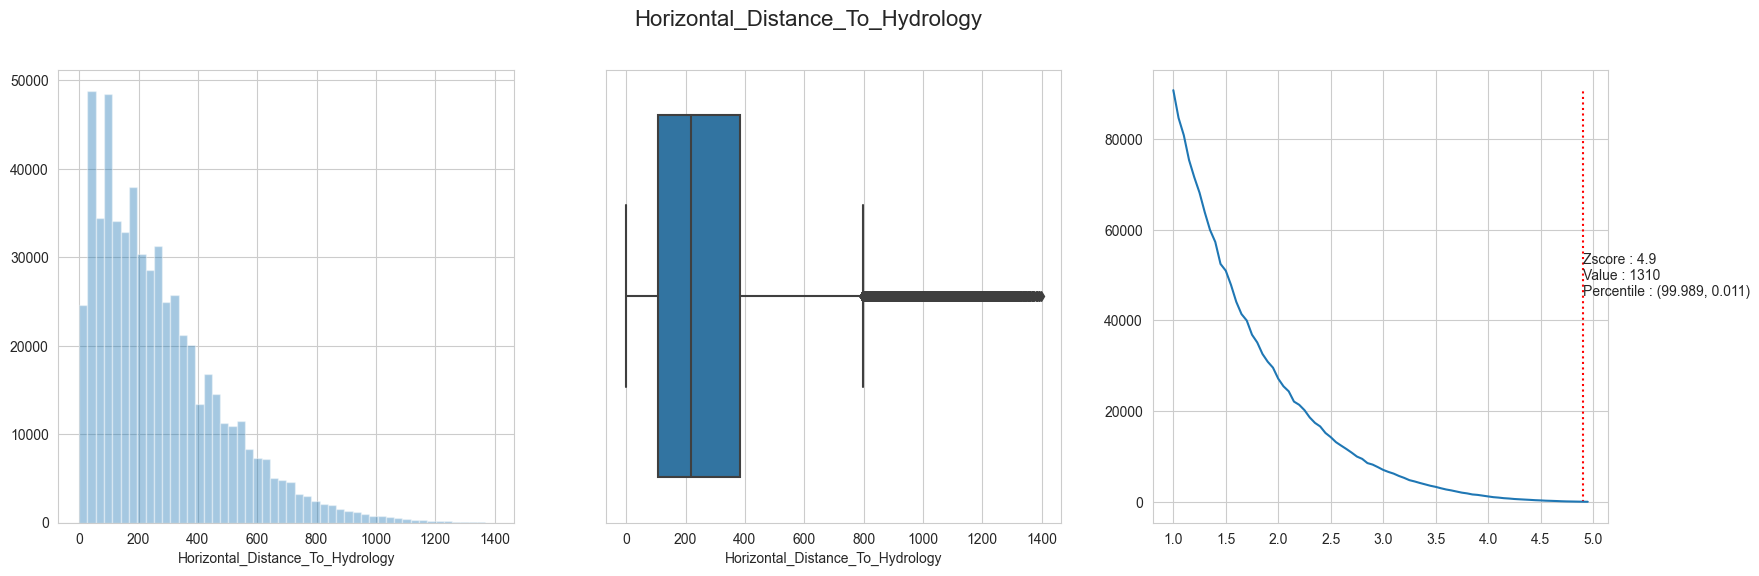

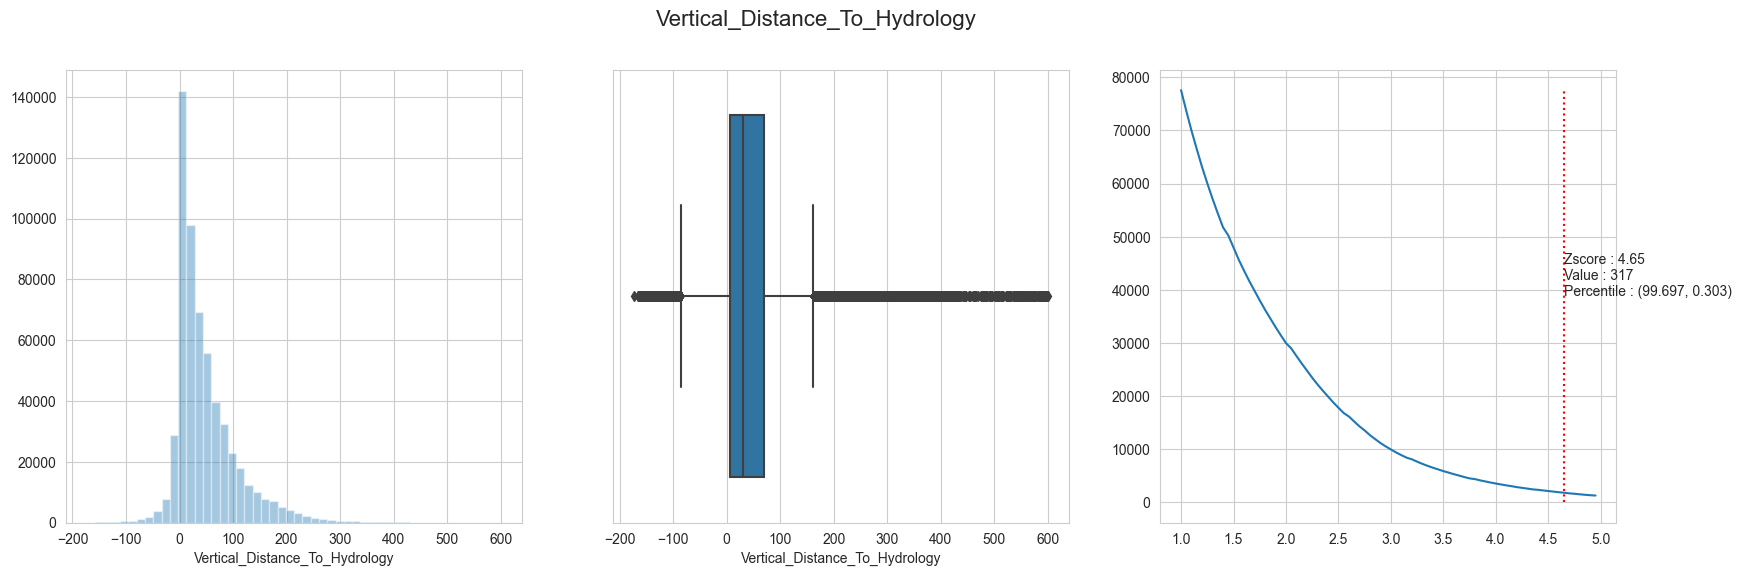

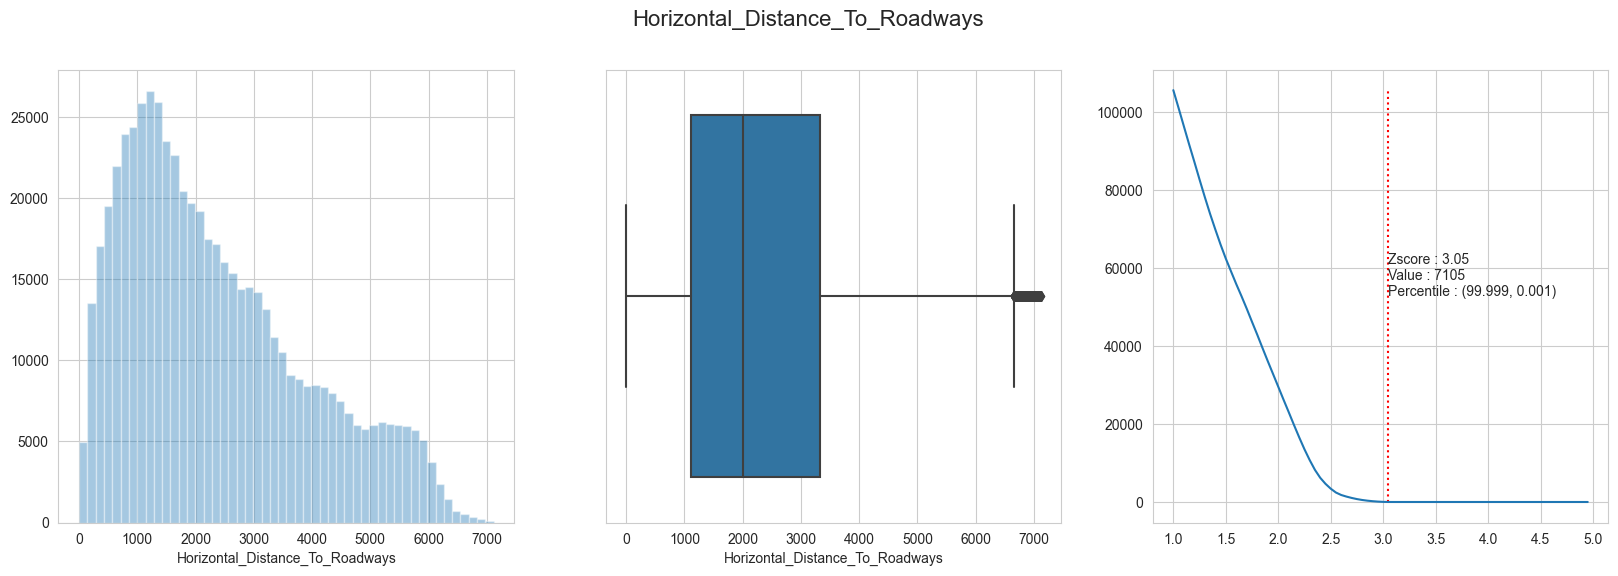

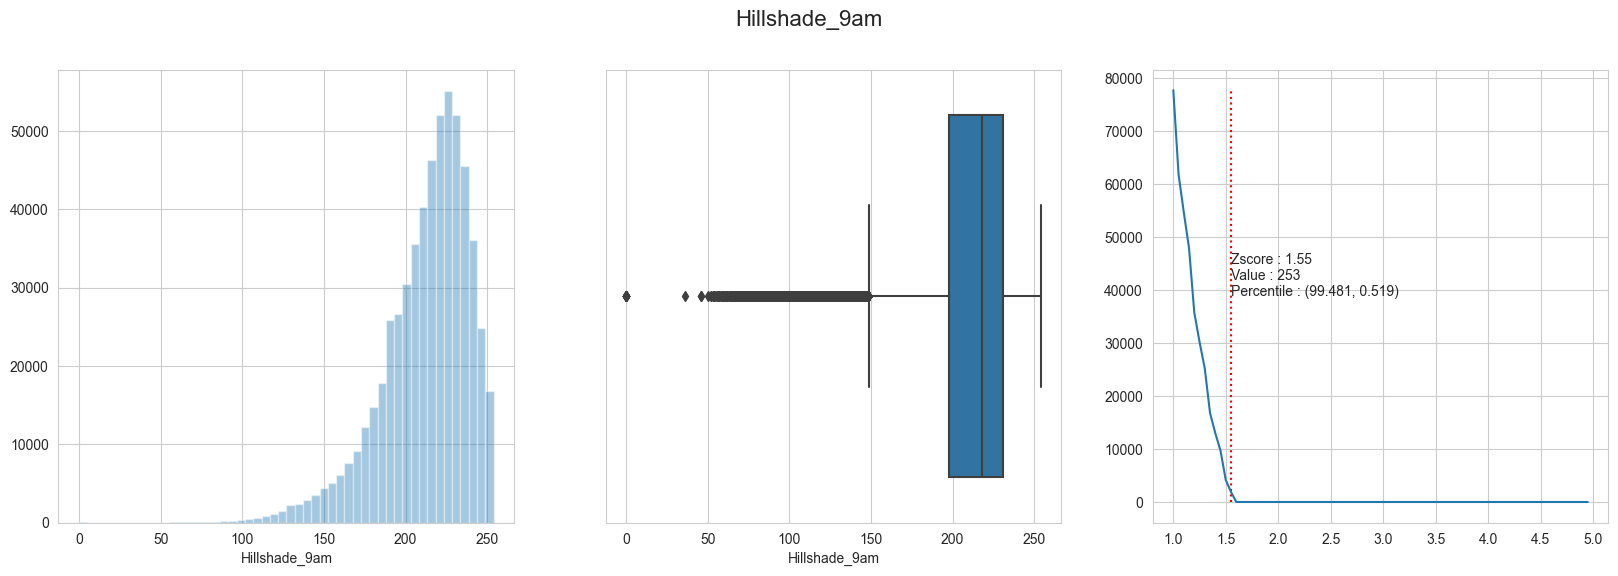

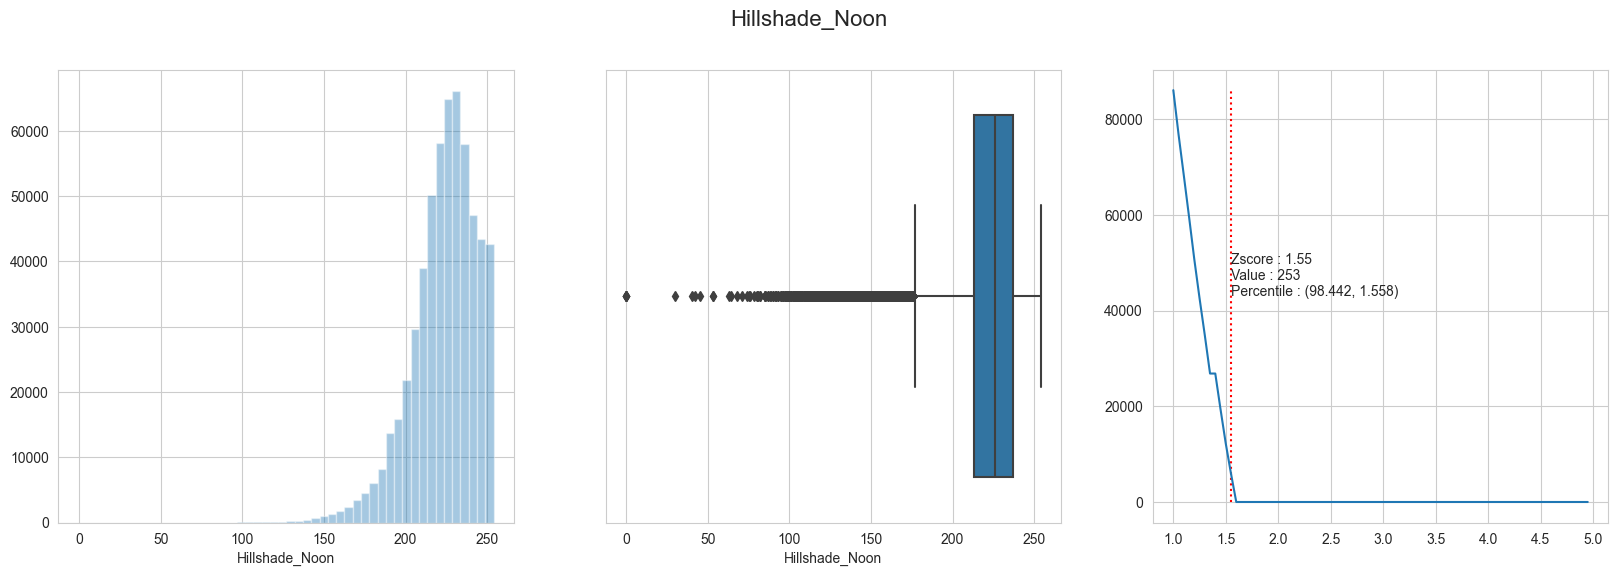

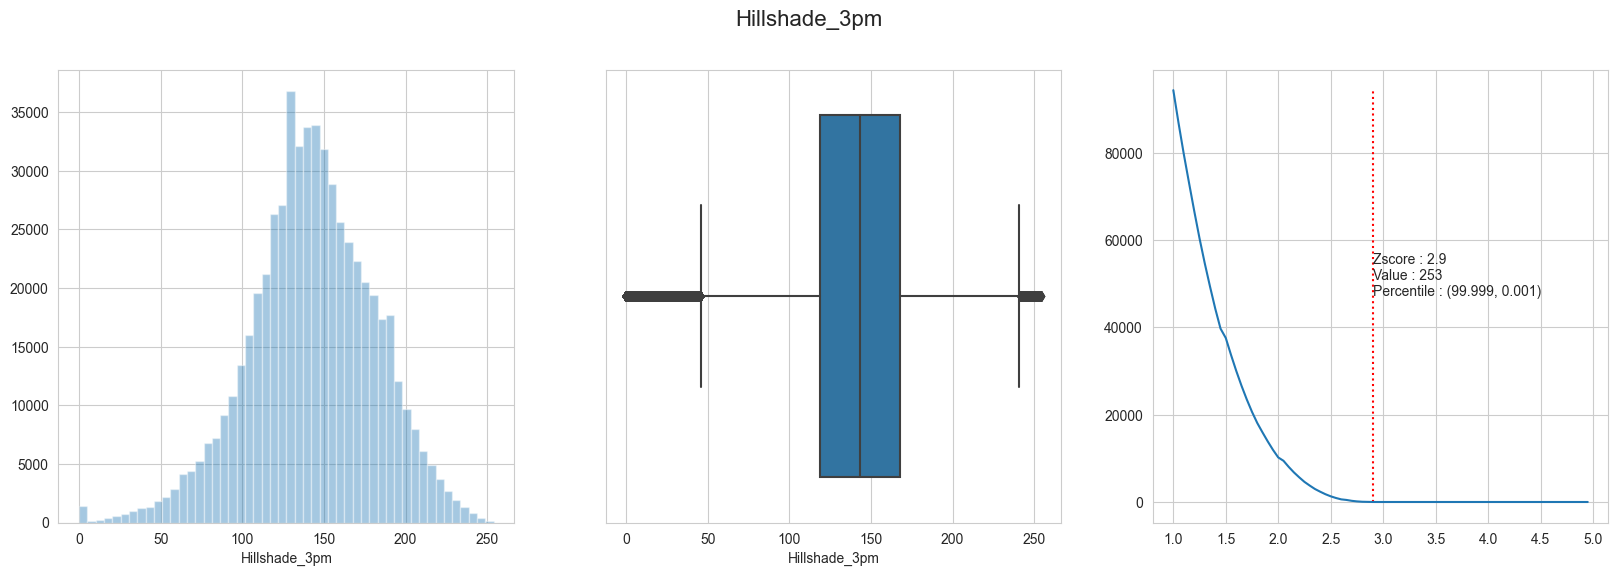

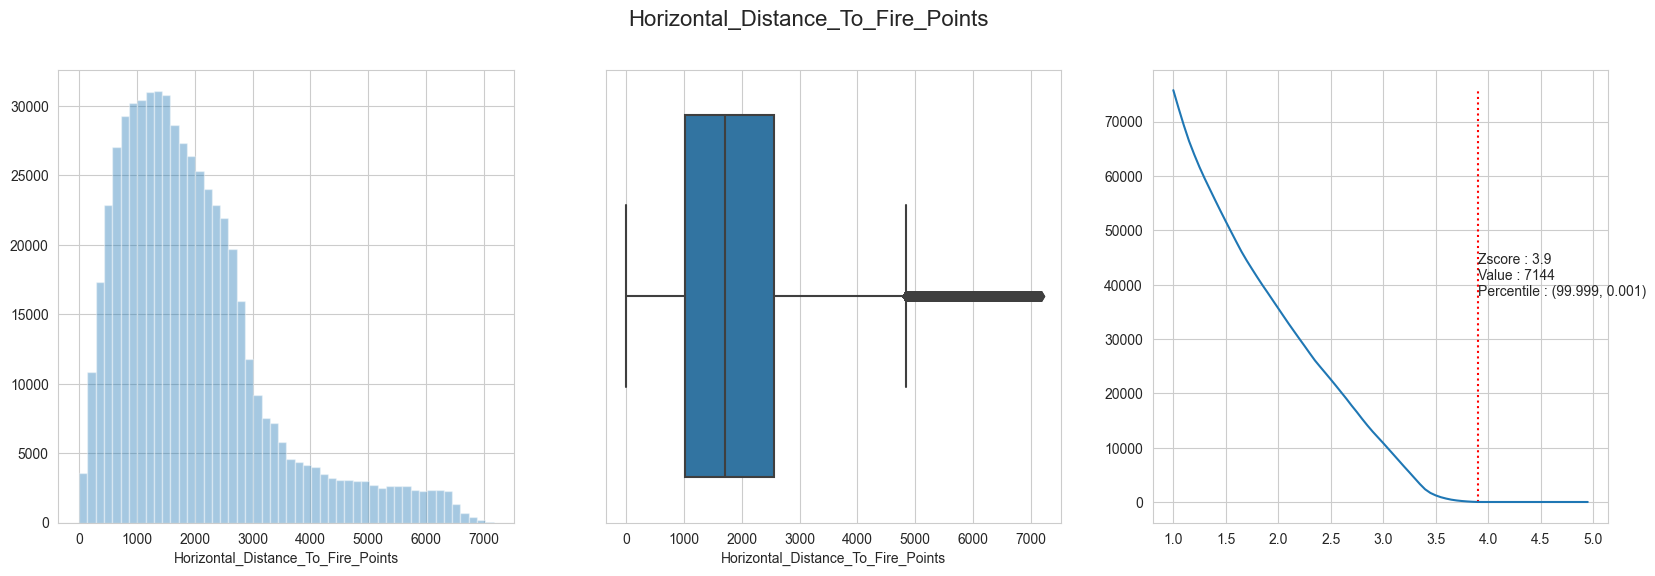

In [16]:
for col in tree.columns[:10]:
    outlier_inspect(tree, col)

## Evaluation

1. There is no missing value in this data set.
2. When each feature is examined, although it is seen that there are outliers in the boxplots, it is evaluated that this dataset does not actually have an outlier.
3. However, since it was considered that the data with a z-score value above 3 according to the tree type would adversely affect the model, it was decided to assign the Nan-Value to these data first and then the average values according to the tree type.

#### *ii. Drop Outliers*

You can define another function to detect outliers in accordance with the ``zscore`` (how many times IQR) value you choose according to the result from the previous functions.

In [17]:
df = tree.copy()

In [18]:
"""This function gives max/min threshold, number of data, number of outlier and plots its boxplot,
according to the tree type and the entered z-score value for the relevant column."""

def num_outliers(df, col, z=1.5):
    q1 = df.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    print("Column_name :", col)
    print("z_score :", z)
    print("-------------------------------------------")
    for i in np.sort(df.Cover_Type.unique()):
        min_threshold = q1.loc[i] - z*iqr.loc[i]
        max_threshold = q3.loc[i] + z*iqr.loc[i]
        print("min_threshold:", min_threshold, "\nmax_threshold:", max_threshold)
        num_outliers = len(df[df["Cover_Type"]==i][col][(df[col]<min_threshold) | (df[col]>max_threshold)])
        print(f"Num_of_values for {i} :", len(df[df["Cover_Type"]==i]))
        print(f"Num_of_outliers for {i} :", num_outliers)
        print("-------------------------------------------")
    return sns.boxplot(y = df[col], x = df["Cover_Type"], whis=z)

In [19]:
"""This function assigns the NaN-value first and then the mean value instead of the outlier values,
according to the tree type and the entered z_score value and plots the boxplot for the relevant column. """

def remove_outliers(df, col, z=1.5):
    q1 = df.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    for i in np.sort(df.Cover_Type.unique()):
        min_threshold = q1.loc[i] - z*iqr.loc[i]
        max_threshold = q3.loc[i] + z*iqr.loc[i]
        df.loc[((df["Cover_Type"]==i) & ((df[col]<min_threshold) | (df[col]>max_threshold))), col] = np.nan
        df[col] = df[col].fillna(df.groupby("Cover_Type")[col].transform("mean"))
    return sns.boxplot(y = df[col], x = df["Cover_Type"], whis=z)

Elevation

Column_name : Elevation
z_score : 3
-------------------------------------------
min_threshold: 2427.0 
max_threshold: 3841.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: 2050.0 
max_threshold: 3786.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: 1394.0 
max_threshold: 3415.25
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: 1656.0 
max_threshold: 2790.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: 2357.0 
max_threshold: 3232.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: 1648.0 
max_threshold: 3216.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: 2970.0 
max_threshold: 3738.25
Num_of_values f

<AxesSubplot:xlabel='Cover_Type', ylabel='Elevation'>

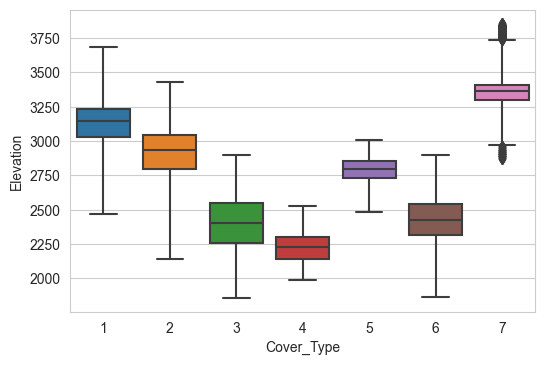

In [20]:
num_outliers(df, "Elevation", z=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Elevation'>

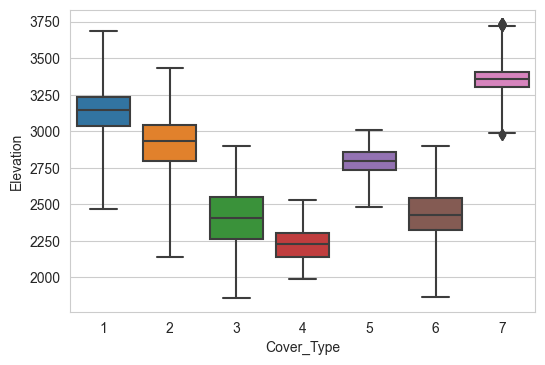

In [21]:
remove_outliers(df, "Elevation", z=3)

Aspect

Column_name : Aspect
z_score : 3
-------------------------------------------
min_threshold: -626.0 
max_threshold: 956.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -483.0 
max_threshold: 784.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -492.0 
max_threshold: 866.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -143.0 
max_threshold: 385.5
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -289.0 
max_threshold: 551.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -785.0 
max_threshold: 1147.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -456.0 
max_threshold: 762.0
Num_of_values for 7 : 2051

<AxesSubplot:xlabel='Cover_Type', ylabel='Aspect'>

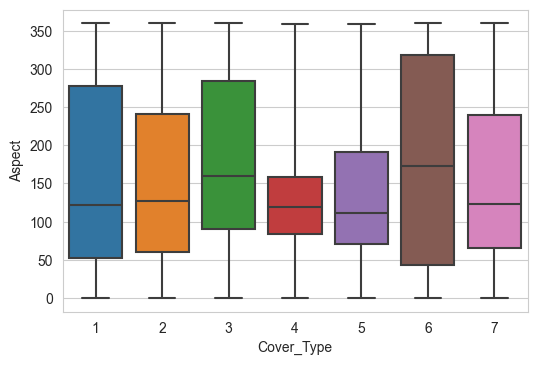

In [22]:
num_outliers(df, "Aspect", z=3)

Slope

Column_name : Slope
z_score : 3
-------------------------------------------
min_threshold: -19.0 
max_threshold: 44.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 96
-------------------------------------------
min_threshold: -22.0 
max_threshold: 48.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 63
-------------------------------------------
min_threshold: -25.0 
max_threshold: 66.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -34.0 
max_threshold: 71.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -26.0 
max_threshold: 58.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -23.0 
max_threshold: 61.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -18.0 
max_threshold: 45.0
Num_of_values for 7 : 20510
Num_of_outli

<AxesSubplot:xlabel='Cover_Type', ylabel='Slope'>

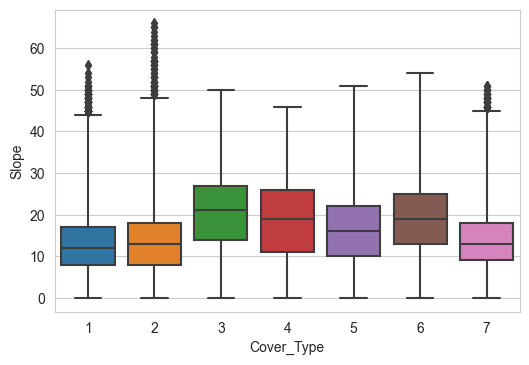

In [23]:
num_outliers(df, "Slope", z=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Slope'>

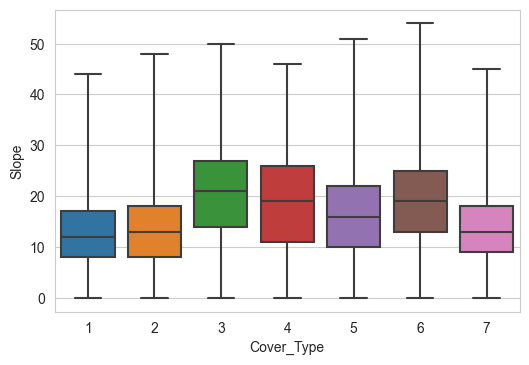

In [24]:
remove_outliers(df, "Slope", z=3)

Horizontal_Distance_To_Hydrology

Column_name : Horizontal_Distance_To_Hydrology
z_score : 3
-------------------------------------------
min_threshold: -820.0 
max_threshold: 1315.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -693.0 
max_threshold: 1204.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 377
-------------------------------------------
min_threshold: -543.0 
max_threshold: 934.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -576.0 
max_threshold: 768.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -560.0 
max_threshold: 945.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 41
-------------------------------------------
min_threshold: -480.0 
max_threshold: 780.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -1095.0 
max_threshold: 1

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Hydrology'>

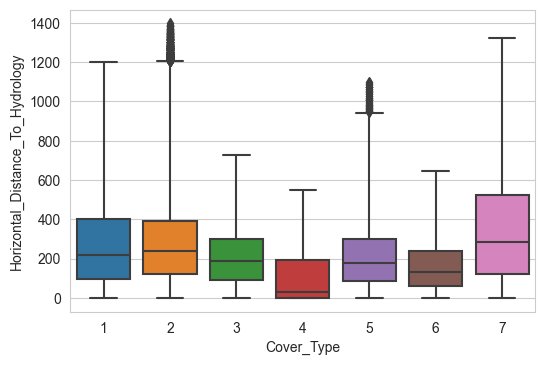

In [25]:
num_outliers(df, "Horizontal_Distance_To_Hydrology", z=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Hydrology'>

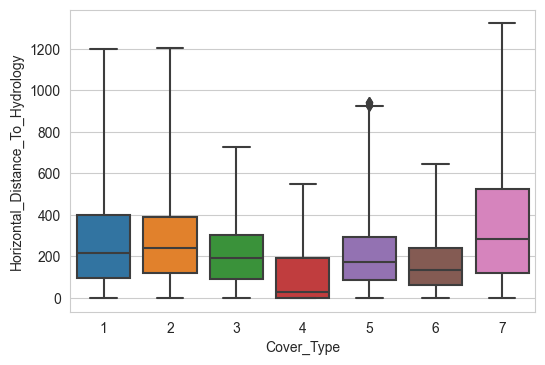

In [26]:
remove_outliers(df, "Horizontal_Distance_To_Hydrology", z=3)

Vertical_Distance_To_Hydrology

Column_name : Vertical_Distance_To_Hydrology
z_score : 3
-------------------------------------------
min_threshold: -170.0 
max_threshold: 236.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 2293
-------------------------------------------
min_threshold: -166.0 
max_threshold: 240.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 3511
-------------------------------------------
min_threshold: -213.0 
max_threshold: 326.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -216.0 
max_threshold: 288.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -219.0 
max_threshold: 306.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -187.0 
max_threshold: 268.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 7
-------------------------------------------
min_threshold: -289.0 
max_threshold: 404

<AxesSubplot:xlabel='Cover_Type', ylabel='Vertical_Distance_To_Hydrology'>

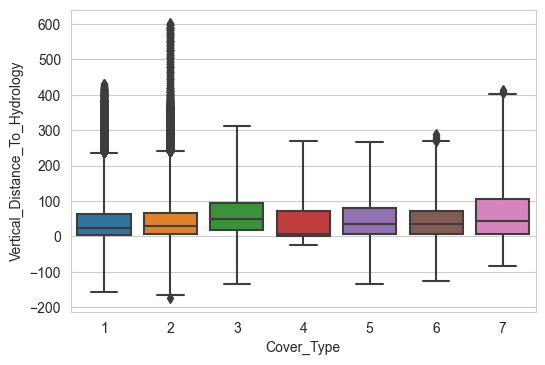

In [27]:
num_outliers(df, "Vertical_Distance_To_Hydrology", z=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Vertical_Distance_To_Hydrology'>

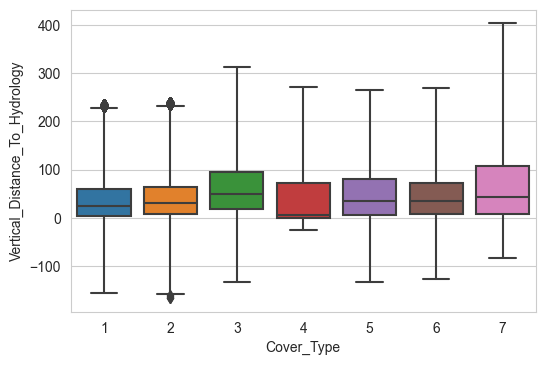

In [28]:
remove_outliers(df, "Vertical_Distance_To_Hydrology", z=3)

Horizontal_Distance_To_Roadways

Column_name : Horizontal_Distance_To_Roadways
z_score : 3
-------------------------------------------
min_threshold: -5272.0 
max_threshold: 10296.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -5672.0 
max_threshold: 10218.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -2038.0 
max_threshold: 3786.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -1158.0 
max_threshold: 3000.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -4032.0 
max_threshold: 6447.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -1776.0 
max_threshold: 3768.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -4219.25 
max_thr

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Roadways'>

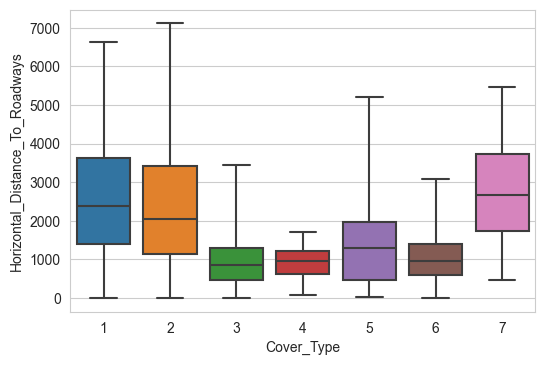

In [29]:
num_outliers(df, "Horizontal_Distance_To_Roadways", z=3)

Hillshade_9am

Column_name : Hillshade_9am
z_score : 3
-------------------------------------------
min_threshold: 106.0 
max_threshold: 323.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 411
-------------------------------------------
min_threshold: 108.0 
max_threshold: 325.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 610
-------------------------------------------
min_threshold: -16.0 
max_threshold: 425.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: 113.0 
max_threshold: 351.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: 121.0 
max_threshold: 331.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: 12.0 
max_threshold: 376.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 3
-------------------------------------------
min_threshold: 106.0 
max_threshold: 330.0
Num_of_values for 7 : 20

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_9am'>

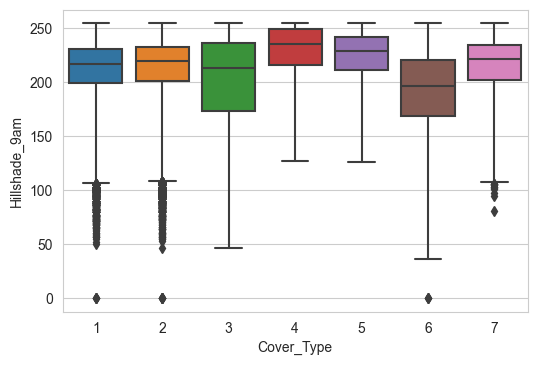

In [30]:
num_outliers(df, "Hillshade_9am", z=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_9am'>

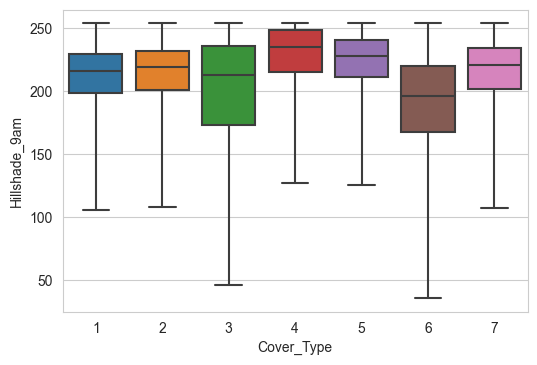

In [31]:
remove_outliers(df, "Hillshade_9am", z=3)

Hillshade_Noon

Column_name : Hillshade_Noon
z_score : 3
-------------------------------------------
min_threshold: 148.0 
max_threshold: 302.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 430
-------------------------------------------
min_threshold: 143.0 
max_threshold: 311.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 296
-------------------------------------------
min_threshold: 86.0 
max_threshold: 352.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: 123.0 
max_threshold: 312.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: 106.0 
max_threshold: 337.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 12
-------------------------------------------
min_threshold: 103.0 
max_threshold: 320.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 1
-------------------------------------------
min_threshold: 136.0 
max_threshold: 311.0
Num_of_values for 7 : 

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_Noon'>

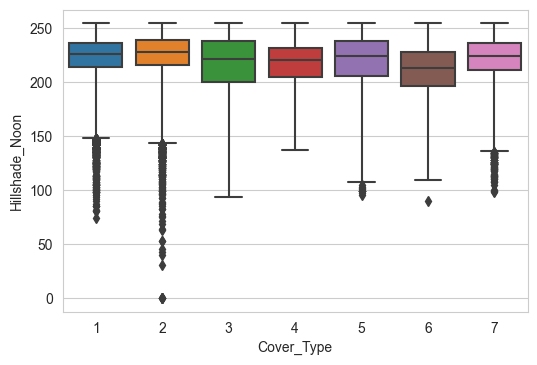

In [32]:
num_outliers(df, "Hillshade_Noon", z=3) 

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_Noon'>

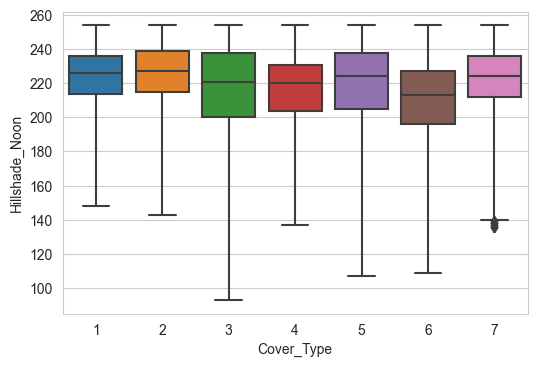

In [33]:
remove_outliers(df, "Hillshade_Noon", z=3)

Hillshade_3pm

Column_name : Hillshade_3pm
z_score : 3
-------------------------------------------
min_threshold: -20.0 
max_threshold: 309.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -21.0 
max_threshold: 308.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -127.0 
max_threshold: 412.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -151.0 
max_threshold: 374.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -131.0 
max_threshold: 373.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -88.0 
max_threshold: 388.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -31.0 
max_threshold: 305.0
Num_of_values for 7 : 20

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_3pm'>

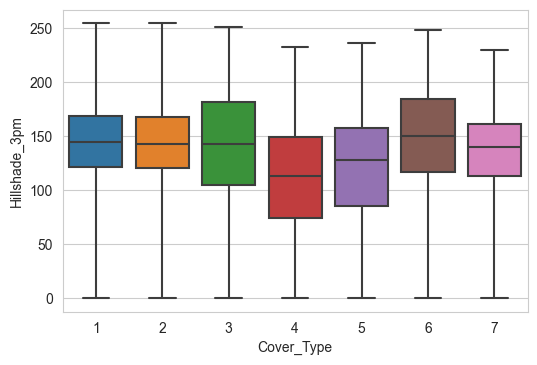

In [34]:
num_outliers(df, "Hillshade_3pm", z=3)

Horizontal_Distance_To_Fire_Points

Column_name : Horizontal_Distance_To_Fire_Points
z_score : 3
-------------------------------------------
min_threshold: -3526.0 
max_threshold: 7268.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -3276.0 
max_threshold: 7105.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 19
-------------------------------------------
min_threshold: -1551.0 
max_threshold: 3265.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -1880.0 
max_threshold: 3594.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -2335.0 
max_threshold: 5218.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 295
-------------------------------------------
min_threshold: -1509.0 
max_threshold: 3510.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -3798.0 
max_

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Fire_Points'>

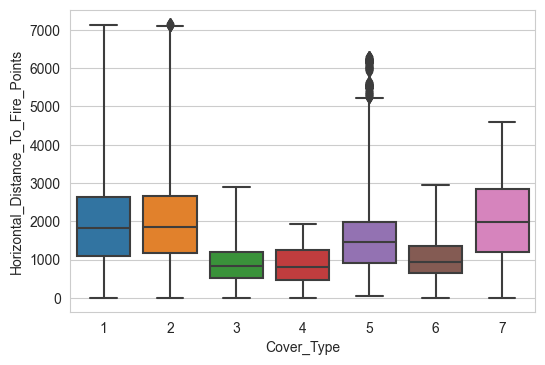

In [35]:
num_outliers(df, "Horizontal_Distance_To_Fire_Points", z=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Fire_Points'>

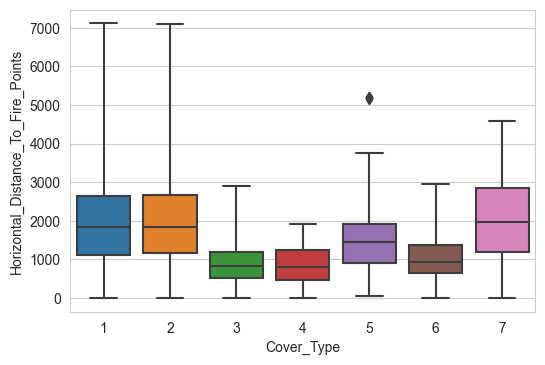

In [36]:
remove_outliers(df, "Horizontal_Distance_To_Fire_Points", z=3)

In [37]:
tree.shape

(581012, 55)

In [38]:
df.shape

(581012, 55)

## 3. Feature Engineering with *sqlite3* Library

Feature engineering is an optional process to increase the predictive success of the model. The effort you put in should be worth increasing success. So you can develop your own feature engineering approach.

Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

You are requested to do feature engineering operations with SQL. There are two ways to do this:
1. After moving the final version of your data set to ***SQLite Browser*** and performing feature engineering operations there, you can convert the resulting data set to dataframe format and use it again in python.
2. In Python, you can create a database and table with your data set by using the functions of the sqlite3 library, after performing feature engineering with SQL, you can convert the resulting data set to a dataframe.

In this case, we will illustrate the second method.

Follow the steps below to do feature engineering with the [sqlite3](https://docs.python.org/3/library/sqlite3.html) library:
 1. Import *sqlite3* library
 2. Create a sqlite database (``"tree_database"``) and transferring dataframe(``tree1``) from python into database table (``covtype2``)
  - You can use *connect(), to_sql() and read_sql_query()* functions.
 3. Assign SQL codes for feature engineering to an object. (produce or transform new columns, get rid of unnecassary columns, make the dataset ready to model)
 4. Transform final version of SQL table to dataframe.
 
Finally, you can save the final version of your data as csv for use in your models and work on a different notebook. On the other hand, you can continue to work on this notebook with the last dataframe.

### My Plan of Feature Extraction
- I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- There is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new column which represent them. So I should drop these columns.

In [39]:
import sqlite3

- Creation a ``sqlite`` database (``"tree_database"``) and transferring dataframe(``tree1``) from python into database table (``covtype2``)

In [40]:
# Creation of the connection and importing dataframe into database.
with sqlite3.connect("tree_database.db") as cnnct:
    df.to_sql("covtype2", cnnct, if_exists = "replace")

In [41]:
query1 = """SELECT *, (Horizontal_Distance_To_Hydrology*Horizontal_Distance_To_Hydrology)+
(Vertical_Distance_To_Hydrology*Vertical_Distance_To_Hydrology) as Square_Hypo_Distance
FROM covtype2;"""

In [42]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [43]:
query2 = """SELECT Elevation, Aspect, Slope, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm,
Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4,
Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8,
Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, 
Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25,
Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, 
Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type,
Square_Hypo_Distance
FROM covtype2;"""

In [44]:
with sqlite3.connect("tree_database.db") as cnnct:
    df1 = pd.read_sql_query(query1, cnnct)  # transforming and exporting to df1
    df1.to_sql("covtype2", cnnct, if_exists = "replace")  # importing again to dropping columns
    df2 = pd.read_sql_query(query2, cnnct)  # exporting table to df2

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  int64  
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Roadways     581012 non-null  int64  
 4   Hillshade_9am                       581012 non-null  float64
 5   Hillshade_Noon                      581012 non-null  float64
 6   Hillshade_3pm                       581012 non-null  int64  
 7   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 8   Wilderness_Area1                    581012 non-null  int64  
 9   Wilderness_Area2                    581012 non-null  int64  
 10  Wilderness_Area3                    581012 non-null  int64  
 11  Wilderness_Area4          

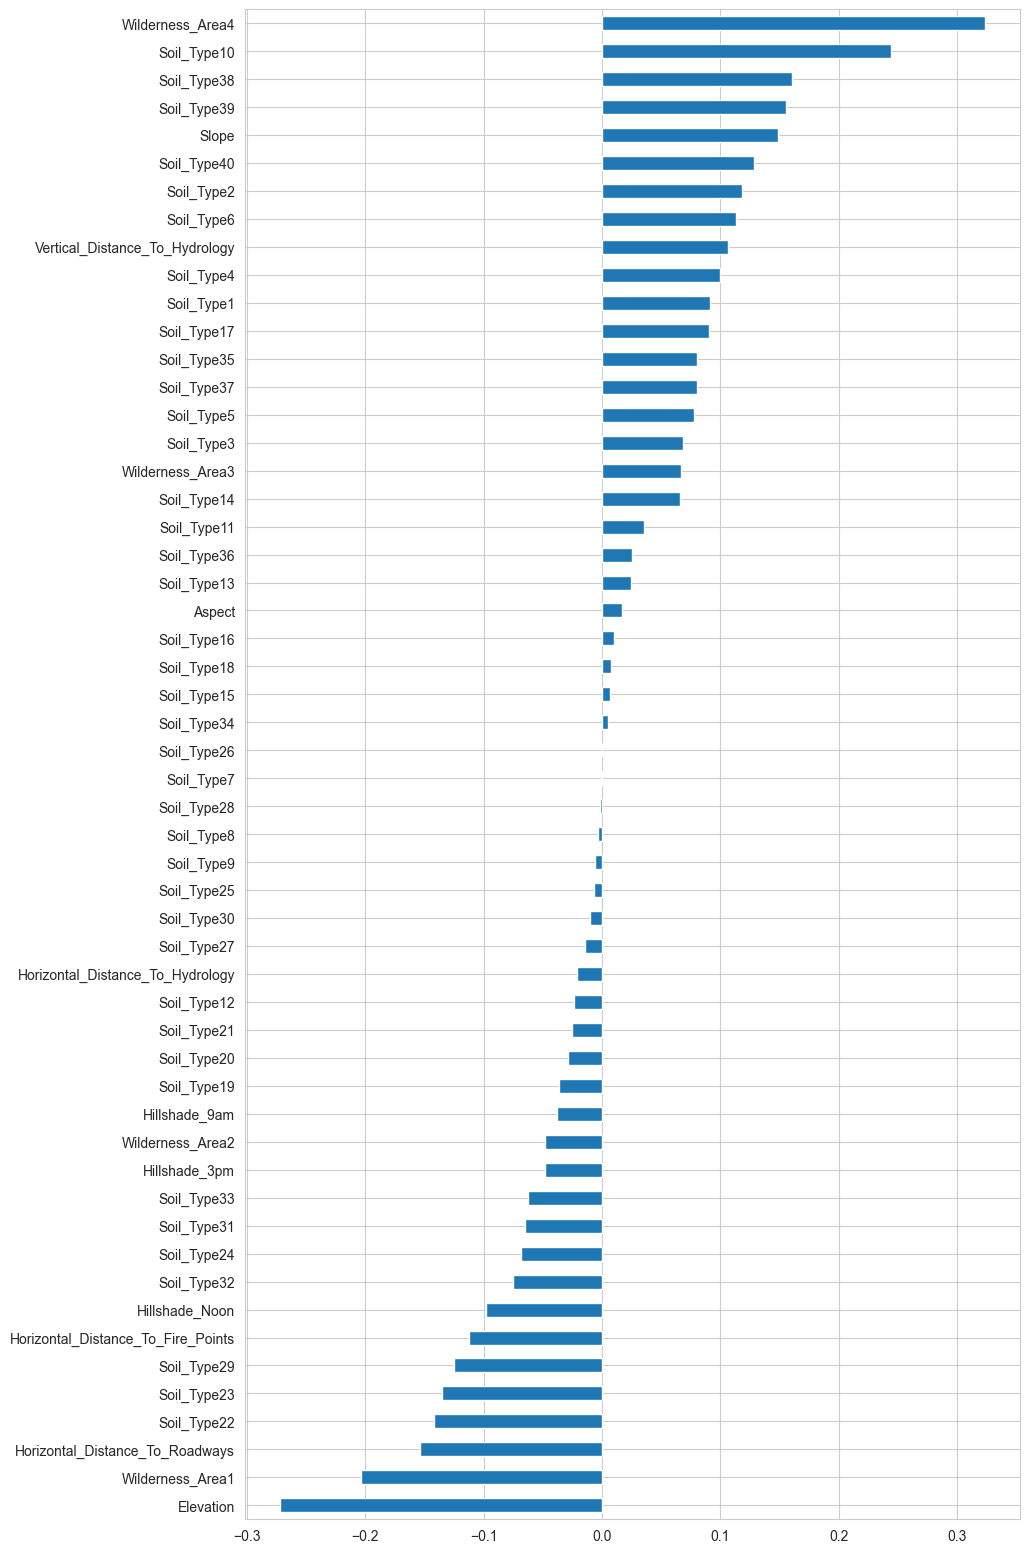

In [46]:
plt.figure(figsize = (10,20))
df.corr()['Cover_Type'].drop('Cover_Type').sort_values().plot.barh();

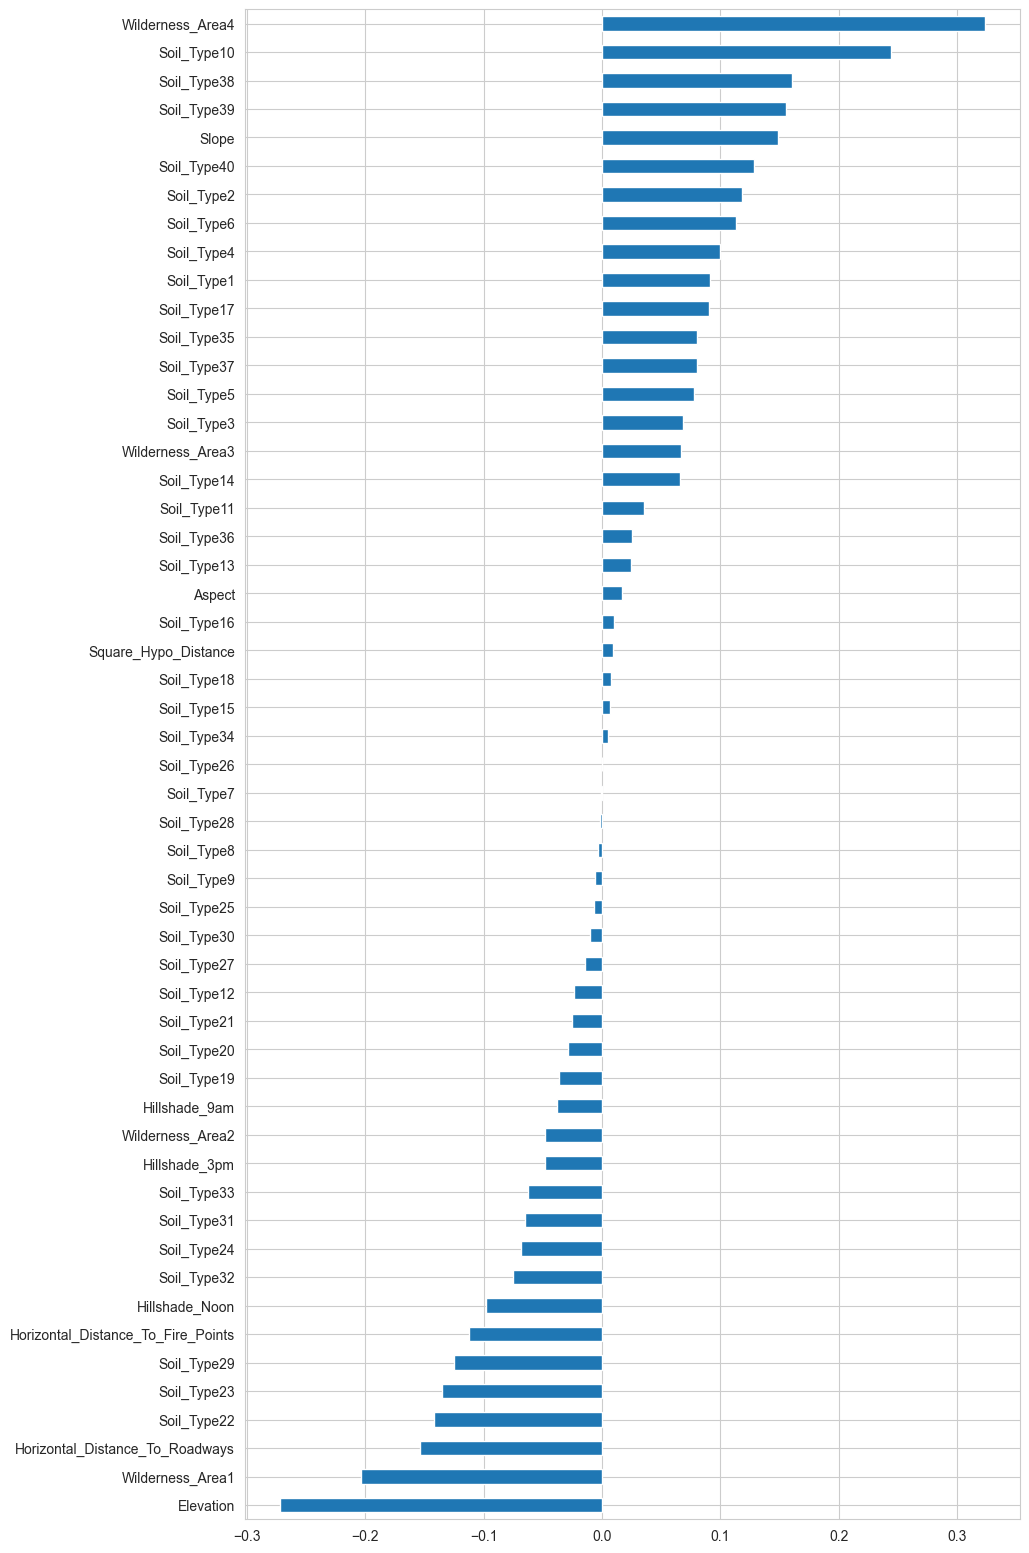

In [47]:
plt.figure(figsize = (10,20))
df2.corr()['Cover_Type'].drop('Cover_Type').sort_values().plot.barh();

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)
 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - KNN (Use ``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
X=df.drop(["Cover_Type"], axis=1)
y=df["Cover_Type"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

In [53]:
log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
y_pred_dummy = pd.get_dummies(y_pred)

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[44185 18030    12     0     1    34  1290]
 [15410 67961  1048     5    56   453    58]
 [    0  1063  8753   175    13   722     0]
 [    0     2   388   340     0    94     0]
 [    9  2716    83     0    24    16     0]
 [    0  1224  2705    15     6  1260     0]
 [ 2628    39     0     0     0     0  3486]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.71      0.70      0.70     63552
           2       0.75      0.80      0.77     84991
           3       0.67      0.82      0.74     10726
           4       0.64      0.41      0.50       824
           5       0.24      0.01      0.02      2848
           6       0.49      0.24      0.32      5210
           7       0.72      0.57      0.63      6153

    accuracy                           0.72    174304
   macro avg       0.60      0.51      0.53    174304
weighted avg       0.71      0.72      0.71    174304



In [100]:
log_model=LogisticRegression(class_weight='balanced')
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
y_pred_dummy = pd.get_dummies(y_pred)

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[42053 11262    23     0  2416   347  7451]
 [19246 44927  1307    22 15292  3448   749]
 [    0    47  5925  1335   499  2920     0]
 [    0     0    53   718     0    53     0]
 [   17   382    40     0  2258   151     0]
 [    0    40  1159   451   158  3402     0]
 [  695     0     0     0     1     0  5457]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.68      0.66      0.67     63552
           2       0.79      0.53      0.63     84991
           3       0.70      0.55      0.62     10726
           4       0.28      0.87      0.43       824
           5       0.11      0.79      0.19      2848
           6       0.33      0.65      0.44      5210
           7       0.40      0.89      0.55      6153

    accuracy                           0.60    174304
   macro avg       0.47      0.71      0.50    174304
weighted avg       0.70      0.60      0.63    174304



In [101]:
log_acc = accuracy_score(y_test, y_pred)
log_f1 = f1_score(y_test, y_pred, average = "macro")
log_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
log_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
log_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
log_auc = roc_auc_score(y_test, y_pred_dummy, average = "macro", multi_class = "ovo")

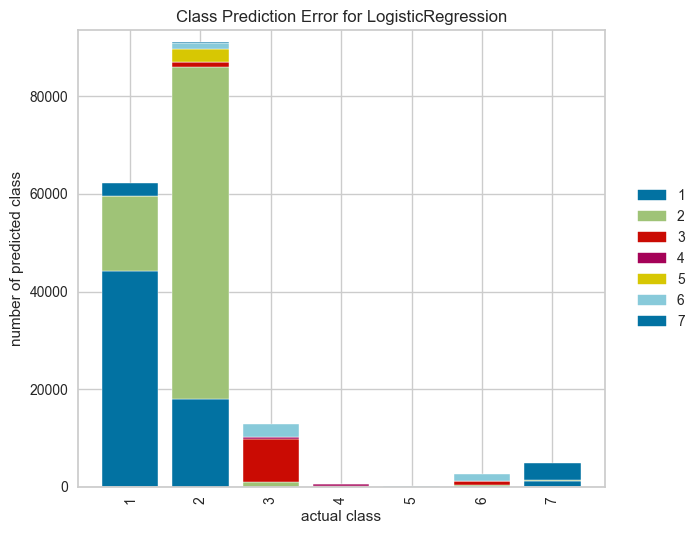

<AxesSubplot:title={'center':'Class Prediction Error for LogisticRegression'}, xlabel='actual class', ylabel='number of predicted class'>

In [55]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(log_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

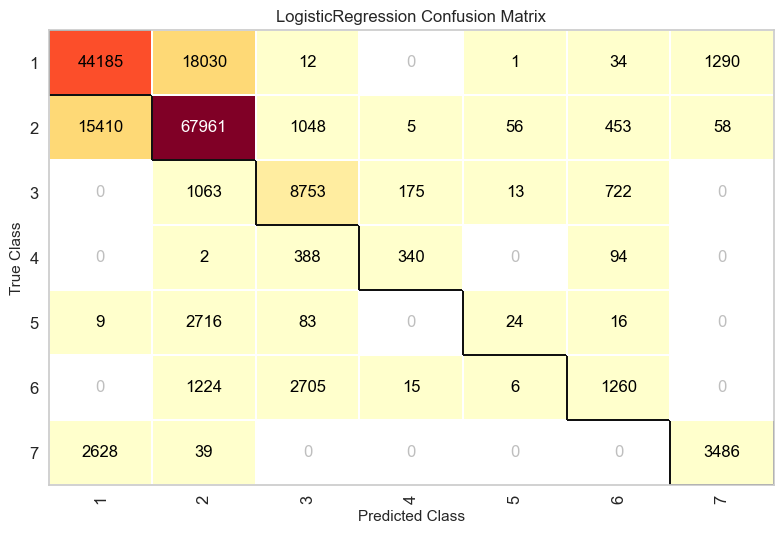

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [56]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(log_model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

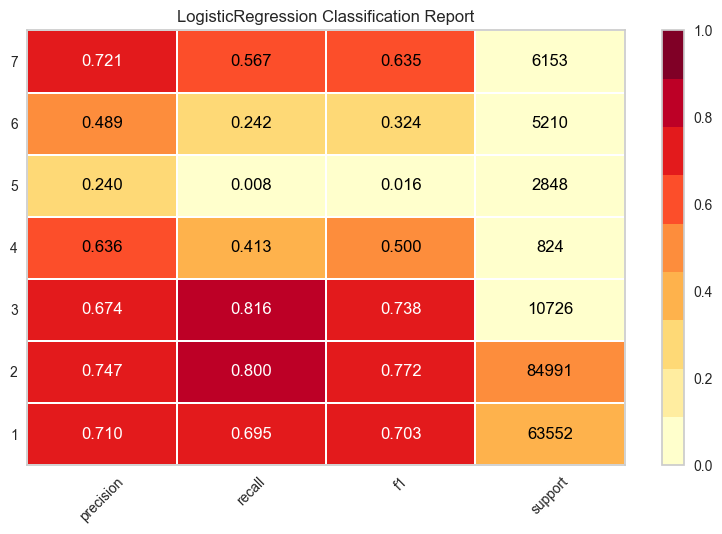

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [57]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(log_model, support=True)
visualizer.fit(X_train_scaled, y_train)        
visualizer.score(X_test_scaled, y_test)        
visualizer.show()

### KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
'''
test_error_rates = []

for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train) 
    y_pred = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)
'''

'\ntest_error_rates = []\n\nfor k in range(1,20):\n    knn_model = KNeighborsClassifier(n_neighbors=k)\n    knn_model.fit(X_train_scaled, y_train) \n    y_pred = knn_model.predict(X_test_scaled)\n    \n    test_error = 1 - accuracy_score(y_test,y_pred)\n    test_error_rates.append(test_error)\n'

In [10]:
'''
plt.figure(figsize=(15,8))
plt.plot(range(1,20), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.05, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.06, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
'''

'\nplt.figure(figsize=(15,8))\nplt.plot(range(1,20), test_error_rates, color=\'blue\', linestyle=\'--\', marker=\'o\',\n         markerfacecolor=\'red\', markersize=10)\nplt.title(\'Error Rate vs. K Value\')\nplt.xlabel(\'K_values\')\nplt.ylabel(\'Error Rate\')\nplt.hlines(y=0.05, xmin = 0, xmax = 30, colors= \'r\', linestyles="--")\nplt.hlines(y=0.06, xmin = 0, xmax = 30, colors= \'r\', linestyles="--")\n'

In [92]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
y_pred_dummy = pd.get_dummies(y_pred)

print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[58542  4644     6     0    41    17   302]
 [ 3761 80346   273     2   308   262    39]
 [   12   305  9706    82    25   596     0]
 [    0     1   144   620     0    59     0]
 [  103   516    42     0  2176    11     0]
 [   21   316   663    39    12  4159     0]
 [  398    55     0     0     0     0  5700]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.93      0.92      0.93     63552
           2       0.93      0.95      0.94     84991
           3       0.90      0.90      0.90     10726
           4       0.83      0.75      0.79       824
           5       0.85      0.76      0.80      2848
           6       0.81      0.80      0.81      5210
           7       0.94      0.93      0.93      6153

    accuracy                           0.93    174304
   macro avg       0.89      0.86      0.87    174304
weighted avg       0.92      0.93      0.92    174304



In [93]:
knn_acc = accuracy_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred, average = "macro")
knn_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
knn_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
knn_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
knn_auc = roc_auc_score(y_test, y_pred_dummy, average = "macro", multi_class = "ovo")

In [97]:
knn_model.predict_proba(X_test_scaled)

array([[0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0.6, 0.4, 0. , ..., 0. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ]])

In [98]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
knn_auc_proba = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

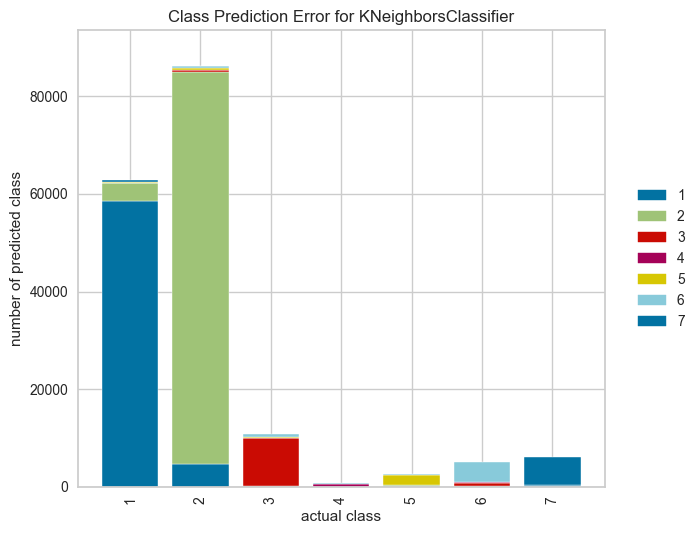

<AxesSubplot:title={'center':'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [94]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(knn_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

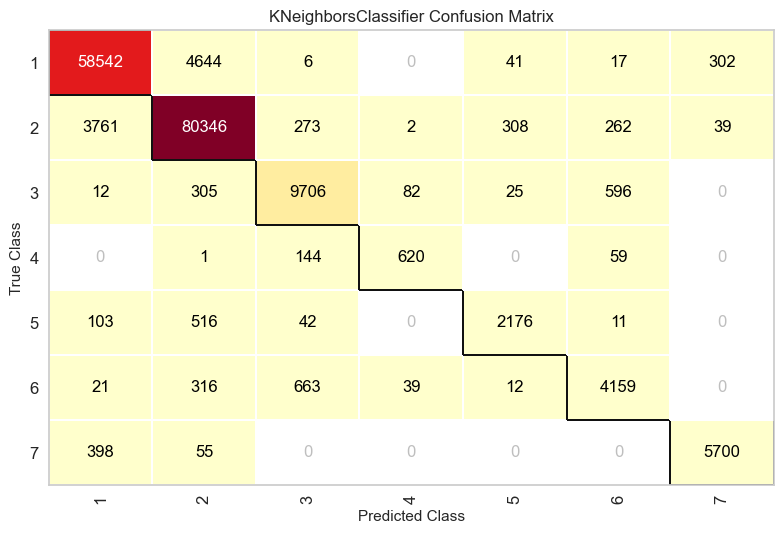

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [95]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(knn_model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

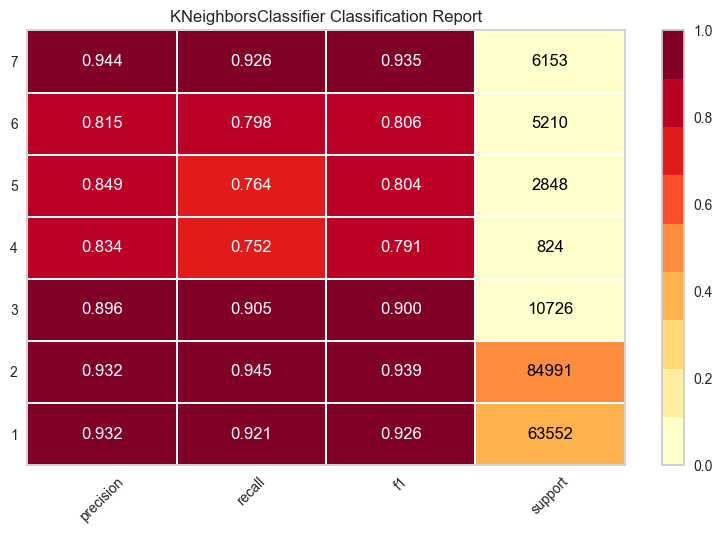

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [96]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(knn_model, support=True)
visualizer.fit(X_train_scaled, y_train)        
visualizer.score(X_test_scaled, y_test)        
visualizer.show()

### SVM

In [58]:
from sklearn.svm import SVC, LinearSVC

In [59]:
svm_model = LinearSVC()
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
y_pred_dummy = pd.get_dummies(y_pred)

print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[43462 18858    49     0     2     0  1181]
 [15040 67726  1954     2    11   128   130]
 [    0  1145  9360    62     0   159     0]
 [    0     0   580   196     0    48     0]
 [   67  2518   246     0    14     3     0]
 [    0  1852  3086    35     0   237     0]
 [ 2983    45     1     0     0     0  3124]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.71      0.68      0.69     63552
           2       0.74      0.80      0.76     84991
           3       0.61      0.87      0.72     10726
           4       0.66      0.24      0.35       824
           5       0.52      0.00      0.01      2848
           6       0.41      0.05      0.08      5210
           7       0.70      0.51      0.59      6153

    accuracy                           0.71    174304
   macro avg       0.62      0.45      0.46    174304
weighted avg       0.70      0.71      0.70    174304



In [60]:
svm_acc = accuracy_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred, average = "macro")
svm_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
svm_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
svm_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
svm_auc = roc_auc_score(y_test, y_pred_dummy, average = "macro", multi_class = "ovo")

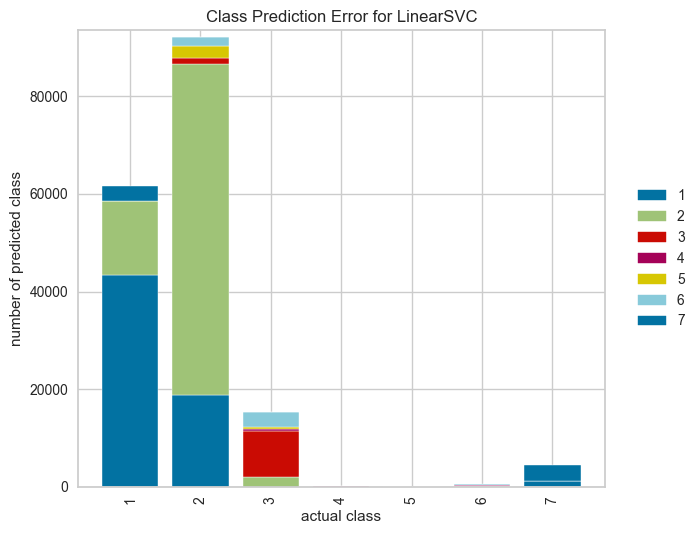

<AxesSubplot:title={'center':'Class Prediction Error for LinearSVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [61]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(svm_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

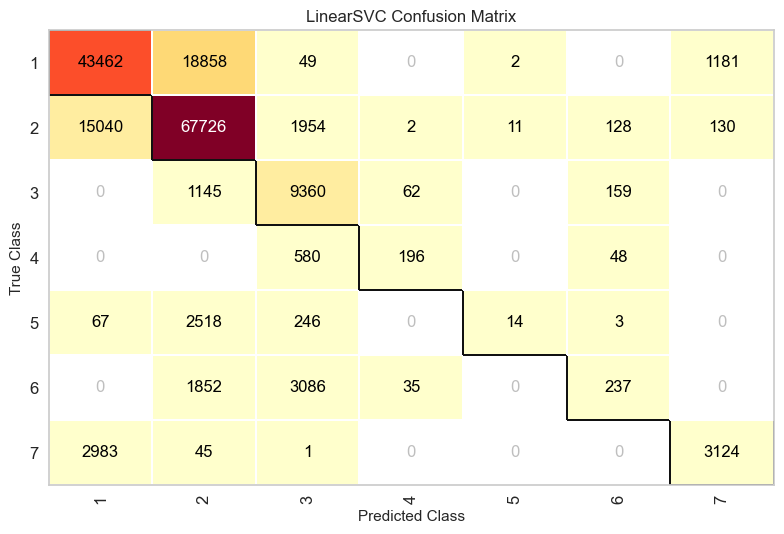

<AxesSubplot:title={'center':'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [62]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(svm_model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

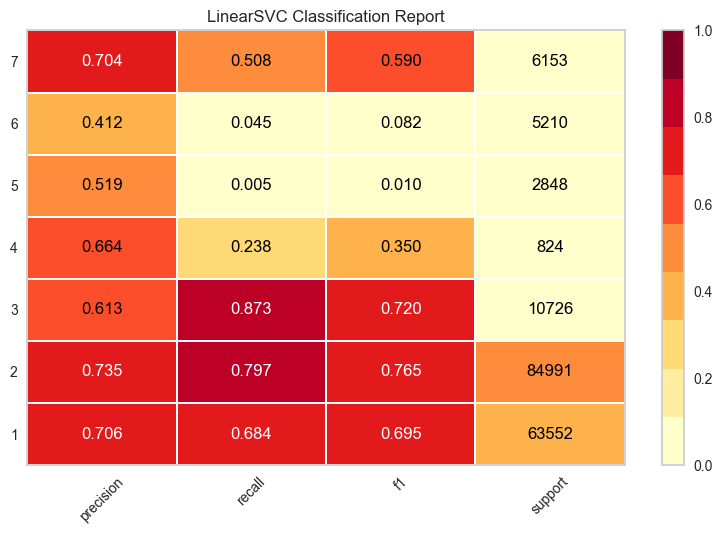

<AxesSubplot:title={'center':'LinearSVC Classification Report'}>

In [63]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(svm_model, support=True)
visualizer.fit(X_train_scaled, y_train)        
visualizer.score(X_test_scaled, y_test)        
visualizer.show()

- SVM has been widely used in finance. For example, predicting stock price via SVM has been a acknowledged application in the industry.
- In classification of text and handwritten objects, SVM performs well.
- It may not be very successful in datasets with more than 100,000 data.

### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt_model = DecisionTreeClassifier(random_state=101)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_pred_dummy = pd.get_dummies(y_pred)

print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[59301  3870     2     0    40    13   326]
 [ 3786 80294   266     1   422   189    33]
 [    5   247  9958    92    25   399     0]
 [    0     0    92   687     0    45     0]
 [   55   416    28     0  2338    11     0]
 [    8   192   476    39     8  4487     0]
 [  354    39     0     0     0     0  5760]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.93      0.93      0.93     63552
           2       0.94      0.94      0.94     84991
           3       0.92      0.93      0.92     10726
           4       0.84      0.83      0.84       824
           5       0.83      0.82      0.82      2848
           6       0.87      0.86      0.87      5210
           7       0.94      0.94      0.94      6153

    accuracy                           0.93    174304
   macro avg       0.90      0.89      0.90    174304
weighted avg       0.93      0.93      0.93    174304



In [66]:
dt_acc = accuracy_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred, average = "macro")
dt_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
dt_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
dt_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
dt_auc = roc_auc_score(y_test, y_pred_dummy, average = "macro", multi_class = "ovo")

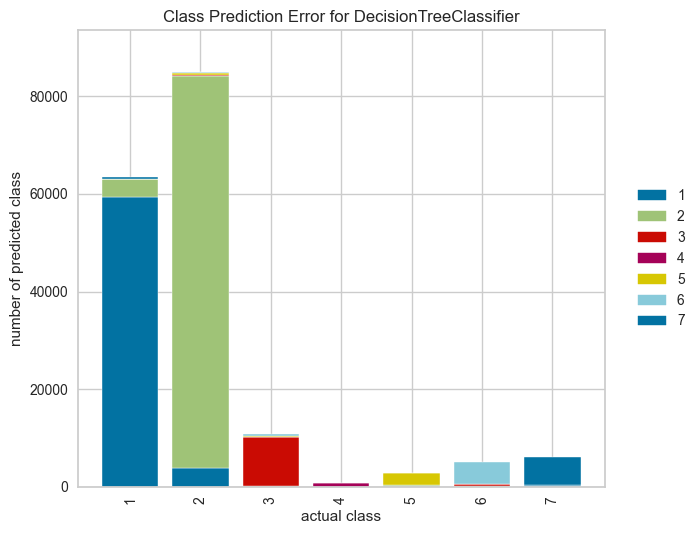

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [67]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(dt_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

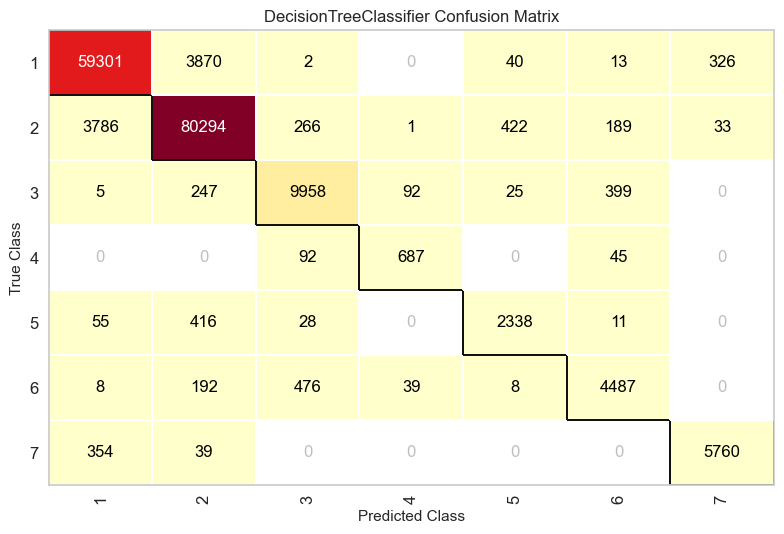

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [68]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(dt_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

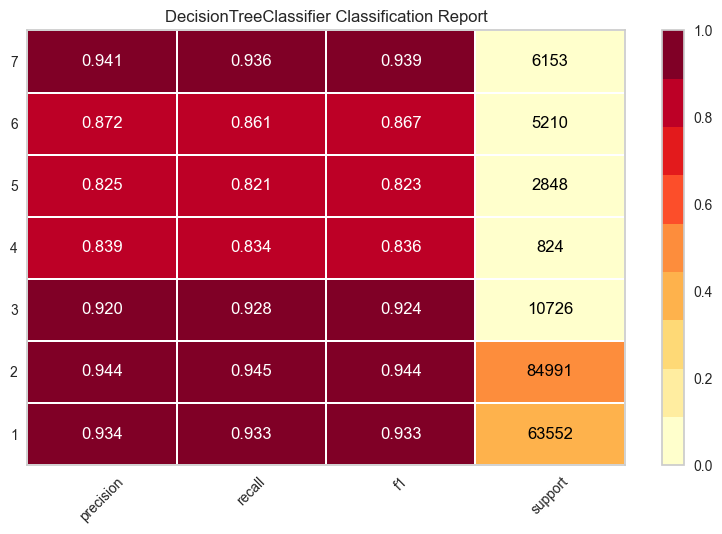

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [69]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(dt_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_dummy = pd.get_dummies(y_pred)

print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[59749  3668     0     0    15     7   113]
 [ 1944 82644   173     1    97   113    19]
 [    2   175 10279    41    12   217     0]
 [    0     0    93   693     0    38     0]
 [   51   582    33     0  2170    12     0]
 [    5   159   370    21     3  4652     0]
 [  363    32     0     0     0     0  5758]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63552
           2       0.95      0.97      0.96     84991
           3       0.94      0.96      0.95     10726
           4       0.92      0.84      0.88       824
           5       0.94      0.76      0.84      2848
           6       0.92      0.89      0.91      5210
           7       0.98      0.94      0.96      6153

    accuracy                           0.95    174304
   macro avg       0.94      0.90      0.92    174304
weighted avg       0.95      0.95      0.95    174304



In [72]:
rf_acc = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred, average = "macro")
rf_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
rf_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
rf_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
rf_auc = roc_auc_score(y_test, y_pred_dummy, average = "macro", multi_class = "ovo")

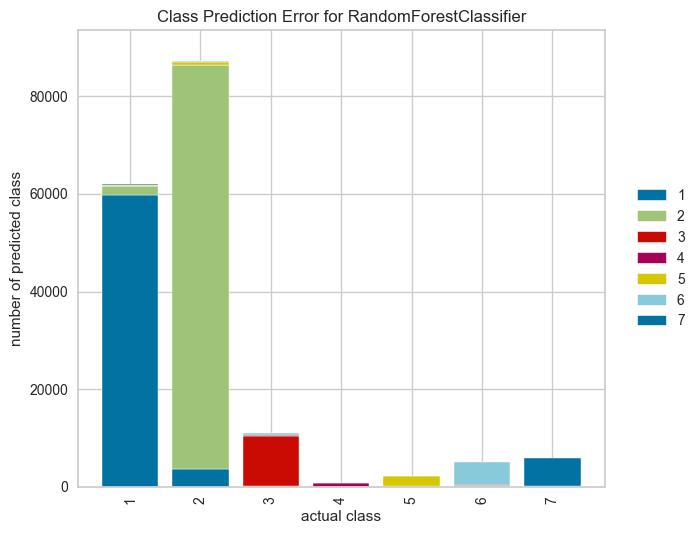

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [73]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rf_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

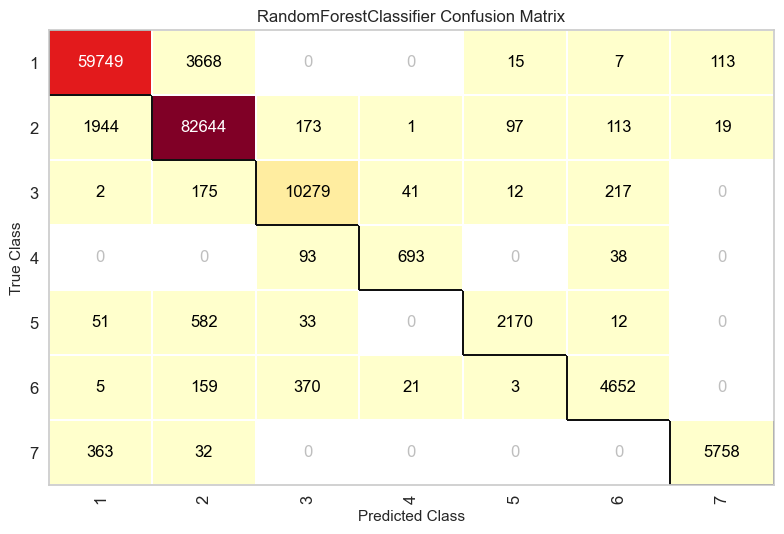

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [74]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

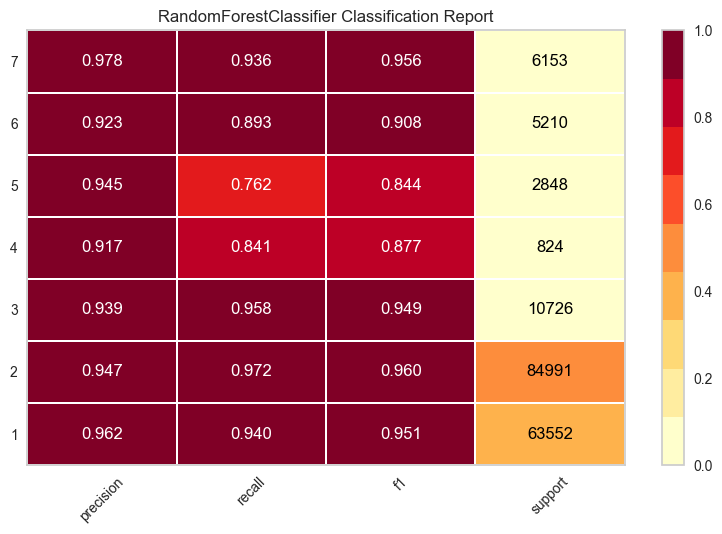

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [75]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### XGBoost

In [76]:
from xgboost import XGBClassifier

In [77]:
xgb_model = XGBClassifier(random_state=101)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_pred_dummy = pd.get_dummies(y_pred)

print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))

[22:16:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[53497  9748     2     0    21     9   275]
 [ 7893 76328   334     2   172   242    20]
 [    2   425  9694    64     2   539     0]
 [    0     1    76   706     0    41     0]
 [   33  1116    57     0  1629    13     0]
 [   10   316   699    25     2  4158     0]
 [  608    15     0     0     0     0  5530]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.86      0.84      0.85     63552
           2       0.87      0.90      0.88     84991
           3       0.89      0.90      0.90     10726
           4       0.89      0.86      0.87       824
           5       0.89      0.57      0.70  

In [78]:
xgb_acc = accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred, average = "macro")
xgb_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
xgb_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
xgb_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
xgb_auc = roc_auc_score(y_test, y_pred_dummy, average = "macro", multi_class = "ovo")

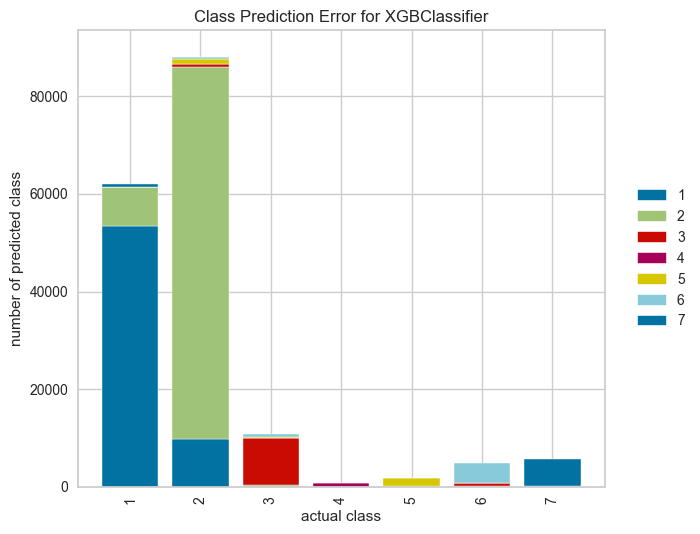

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [79]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(xgb_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

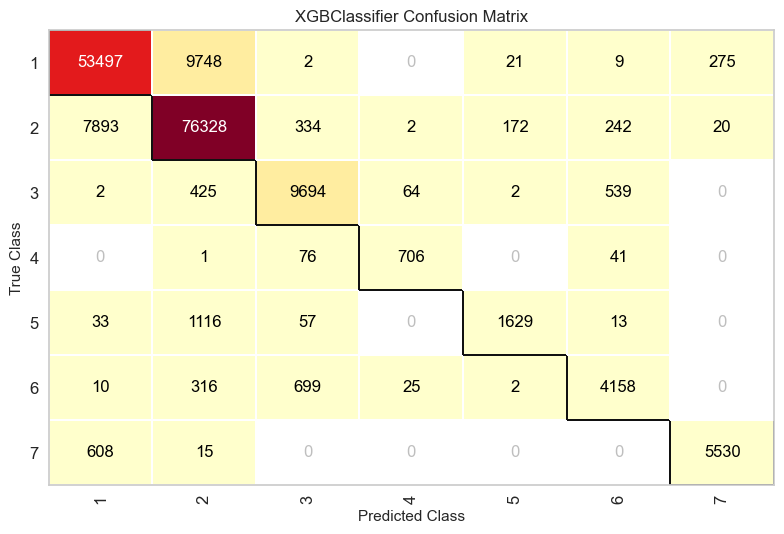

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [80]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(xgb_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

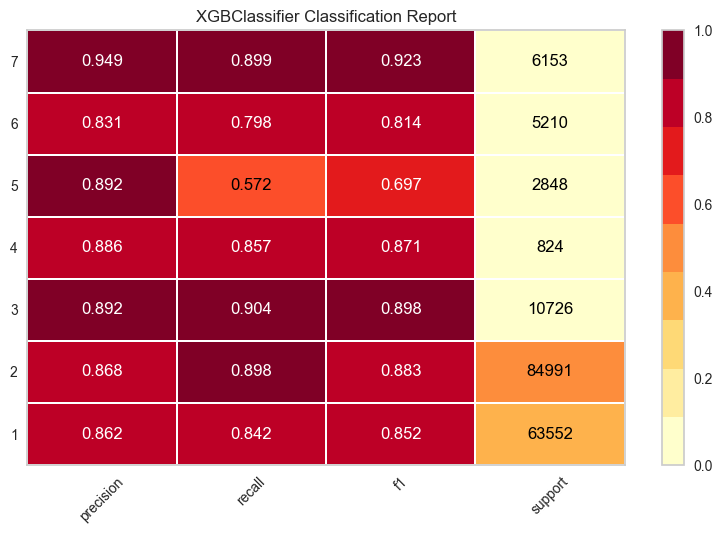

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [81]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(xgb_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### LightGBM

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

- Faster training speed and higher efficiency.
- Lower memory usage.
- Better accuracy.
- Support of parallel, distributed, and GPU learning.
- Capable of handling large-scale data.

In [84]:
#!pip install lightgbm

In [85]:
from lightgbm import LGBMClassifier

In [86]:
lgb_model = LGBMClassifier(random_state=101)
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)
y_pred_dummy = pd.get_dummies(y_pred)

print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[52080 11098     3     7    37     8   319]
 [ 8427 75502   413    15   256   340    38]
 [    0   427  9688   119     9   483     0]
 [    0     0   133   651     0    40     0]
 [   12  1008    48     0  1776     4     0]
 [   10   349   674    46     6  4125     0]
 [  682    15     0     0     0     0  5456]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.85      0.82      0.83     63552
           2       0.85      0.89      0.87     84991
           3       0.88      0.90      0.89     10726
           4       0.78      0.79      0.78       824
           5       0.85      0.62      0.72      2848
           6       0.82      0.79      0.81      5210
           7       0.94      0.89      0.91      6153

    accuracy                           0.86    174304
   macro avg       0.85      0.81      0.83    174304
weighted avg       0.86      0.86      0.86    174304



In [87]:
lgb_acc = accuracy_score(y_test, y_pred)
lgb_f1 = f1_score(y_test, y_pred, average = "macro")
lgb_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
lgb_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
lgb_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
lgb_auc = roc_auc_score(y_test, y_pred_dummy, average = "macro", multi_class = "ovo")

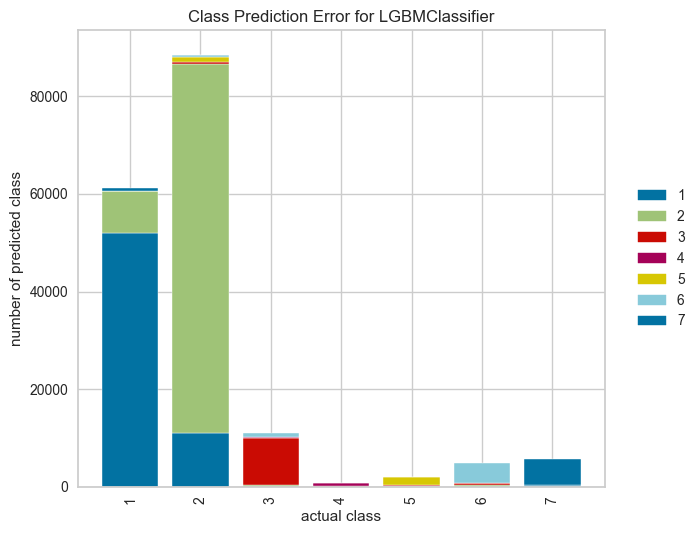

<AxesSubplot:title={'center':'Class Prediction Error for LGBMClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [88]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(lgb_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

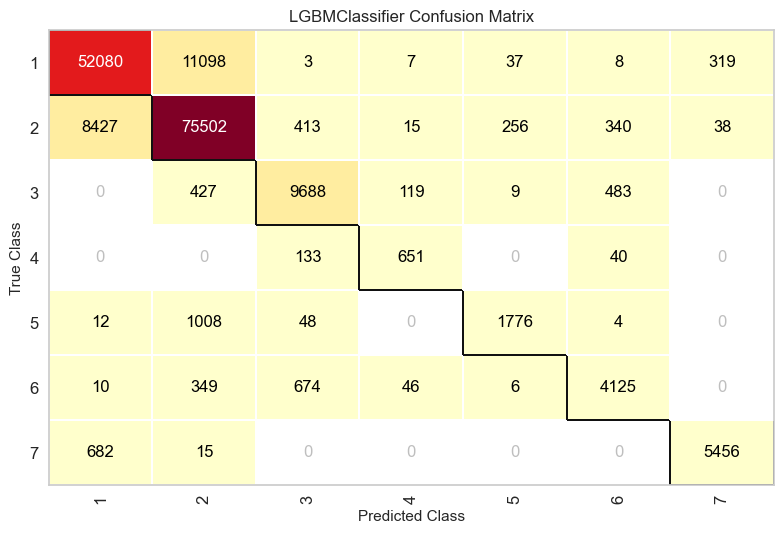

<AxesSubplot:title={'center':'LGBMClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [89]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(lgb_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

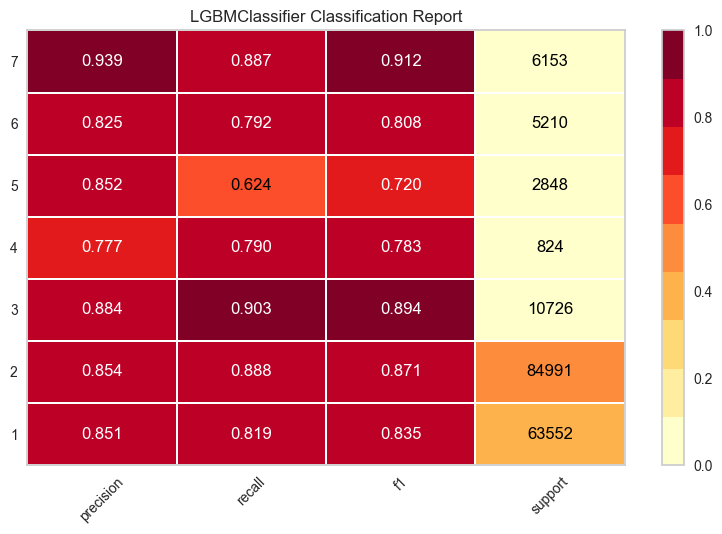

<AxesSubplot:title={'center':'LGBMClassifier Classification Report'}>

In [90]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(lgb_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### Comparing

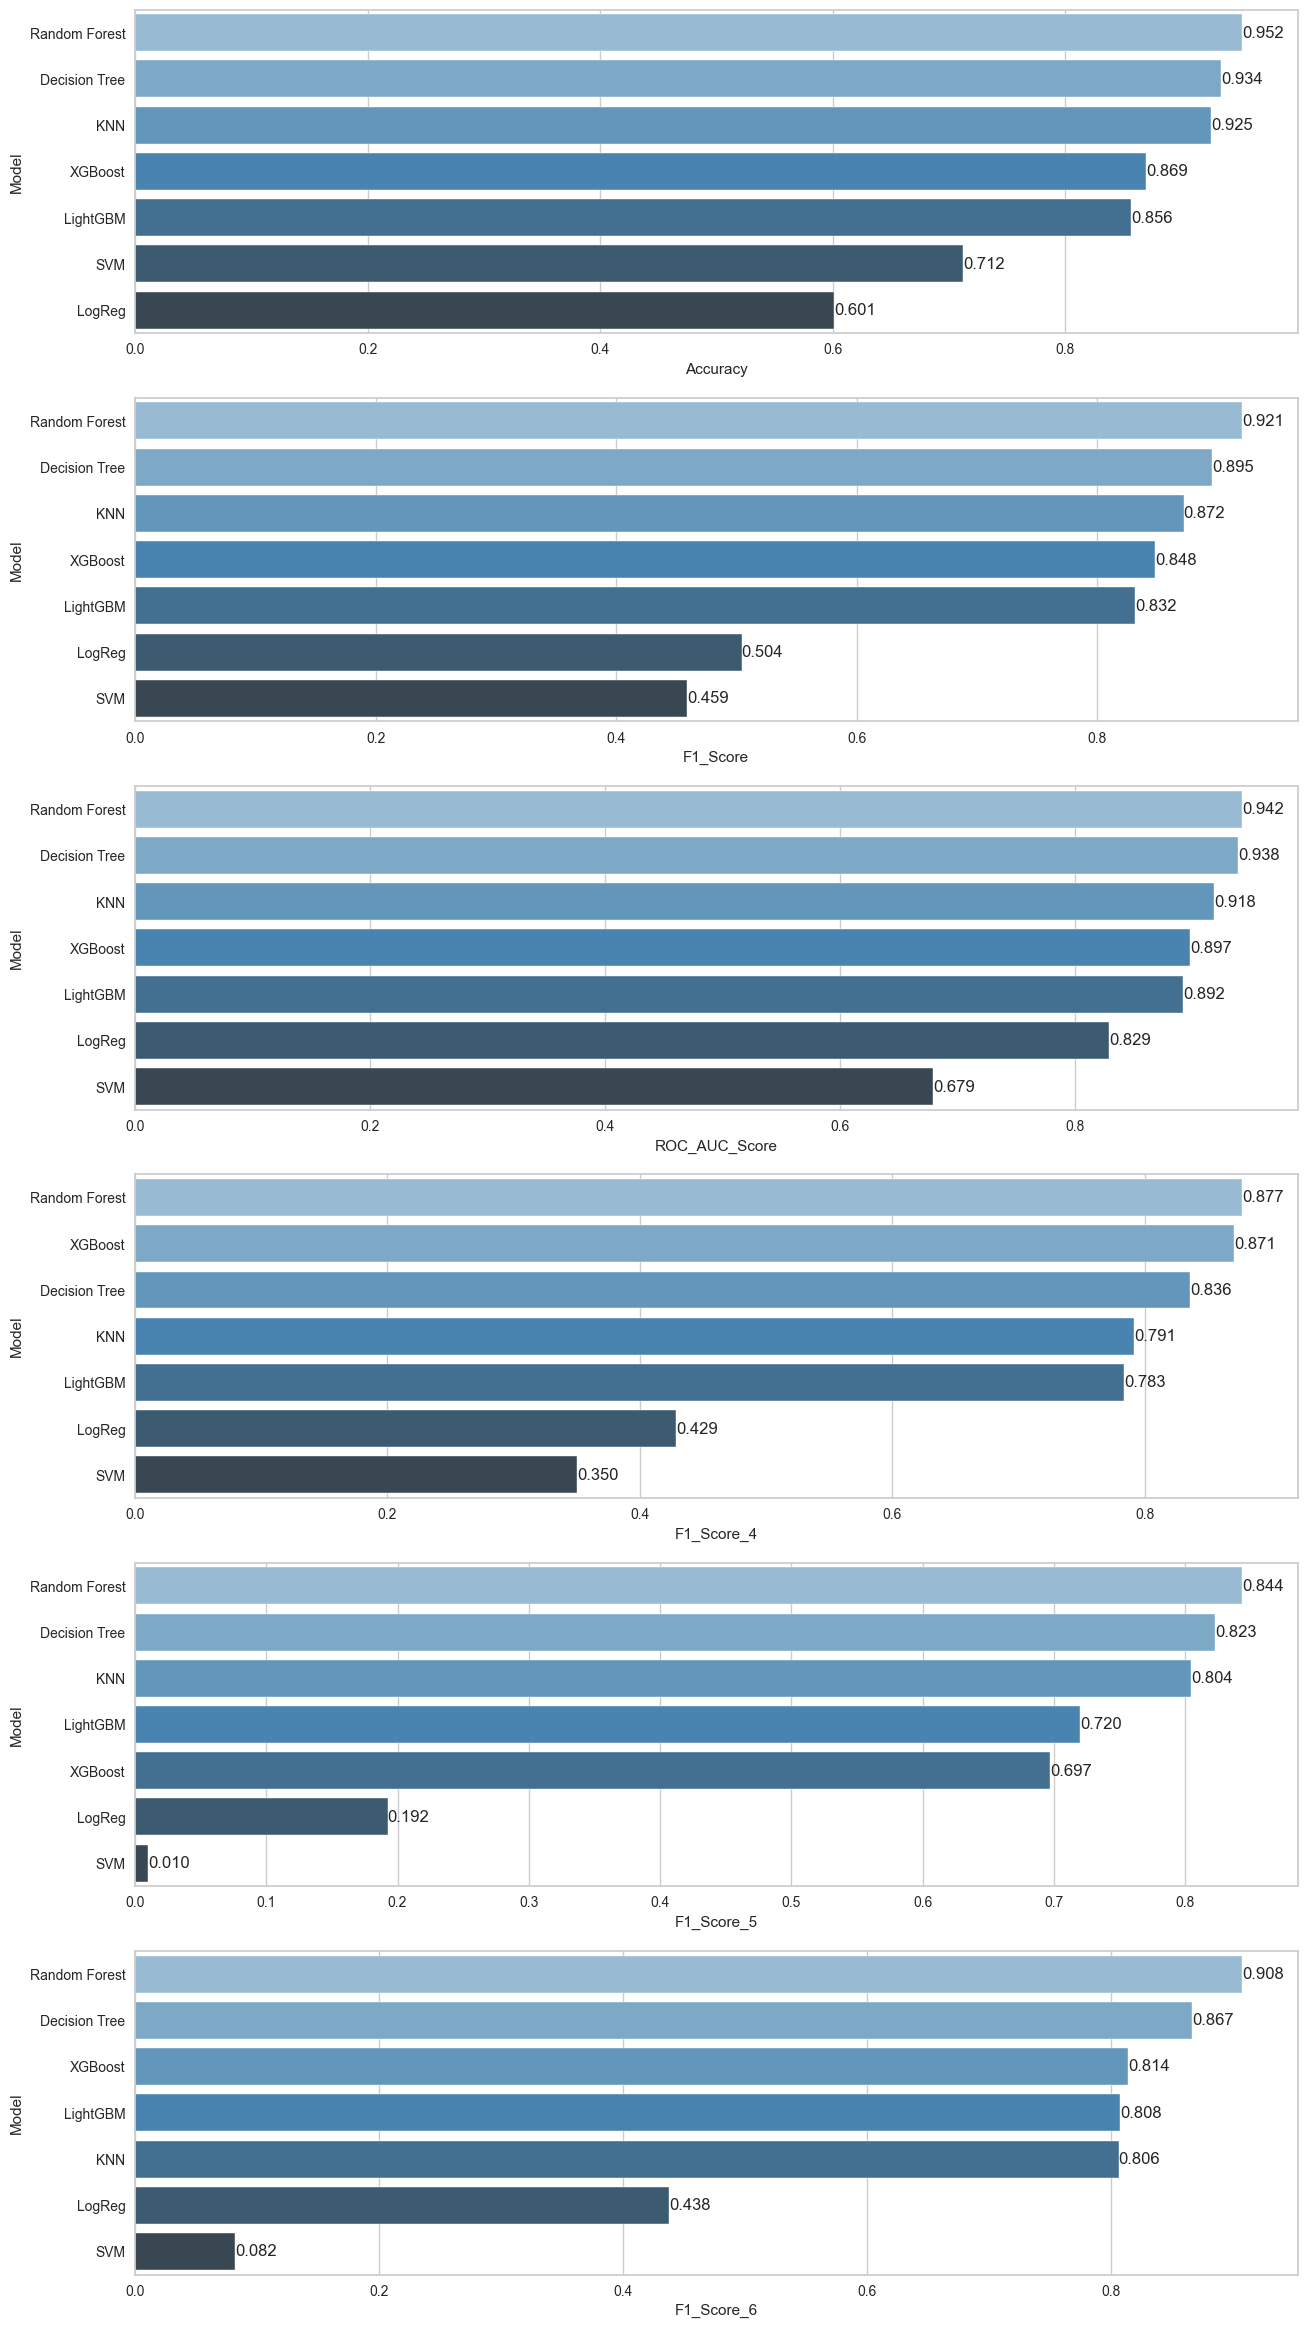

In [102]:
compare = pd.DataFrame({"Model": ["LogReg", "KNN", "SVM", "Decision Tree", "Random Forest", "XGBoost", "LightGBM"],
                        "Accuracy": [log_acc, knn_acc, svm_acc, dt_acc, rf_acc, xgb_acc, lgb_acc],
                        "F1_Score": [log_f1, knn_f1, svm_f1, dt_f1, rf_f1, xgb_f1, lgb_f1],
                        "F1_Score_4": [log_f1_4, knn_f1_4, svm_f1_4, dt_f1_4, rf_f1_4, xgb_f1_4, lgb_f1_4],
                        "F1_Score_5": [log_f1_5, knn_f1_5, svm_f1_5, dt_f1_5, rf_f1_5, xgb_f1_5, lgb_f1_5],
                        "F1_Score_6": [log_f1_6, knn_f1_6, svm_f1_6, dt_f1_6, rf_f1_6, xgb_f1_6, lgb_f1_6],
                        "ROC_AUC_Score": [log_auc, knn_auc, svm_auc, dt_auc, rf_auc, xgb_auc, lgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(611)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(612)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(613)
compare = compare.sort_values(by="ROC_AUC_Score", ascending=False)
ax=sns.barplot(x="ROC_AUC_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(614)
compare = compare.sort_values(by="F1_Score_4", ascending=False)
ax=sns.barplot(x="F1_Score_4", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(615)
compare = compare.sort_values(by="F1_Score_5", ascending=False)
ax=sns.barplot(x="F1_Score_5", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(616)
compare = compare.sort_values(by="F1_Score_6", ascending=False)
ax=sns.barplot(x="F1_Score_6", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

## Modeling and Prediction

In [104]:
import pickle

In [105]:
final_model = RandomForestClassifier(random_state=101).fit(X, y)

In [106]:
pickle.dump(final_model, open("final_model_tree_types", 'wb'))

In [108]:
my_dict = {"Elevation": 2500,
           "Aspect": 150,
           "Slope": 30,
           "Horizontal_Distance_To_Hydrology": 100,
           "Vertical_Distance_To_Hydrology": 25,
           "Horizontal_Distance_To_Roadways": 2000,
           "Hillshade_9am": 218,
           "Hillshade_Noon": 226,
           "Hillshade_3pm": 143,
           "Horizontal_Distance_To_Fire_Points": 3000,
           "Wilderness": "Area1",
           "Soil": "Type5"
          }

In [109]:
my_dict = pd.DataFrame([my_dict])
my_dict

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness,Soil
0,2500,150,30,100,25,2000,218,226,143,3000,Area1,Type5


In [110]:
my_dict = pd.get_dummies(my_dict).reindex(columns=X.columns, fill_value=0)
my_dict

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2500,150,30,100,25,2000,218,226,143,3000,...,0,0,0,0,0,0,0,0,0,0


In [111]:
final_model.predict(my_dict)

array([2], dtype=int64)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___